## Table Of Content:
* [Introduction](#Bank-Loan-Term-Prediction)
* [Data](#Loading-Data)
* [Data Cleaning](#Data-Cleaning)
* [Baseline Before EDA](#FIRST-BASELINE-BEFORE-EDA)
* [EDA](#EDA)
* [Baseline(Logistic Regression)]( #Logistic-Regression)
* [Feature Engineering](#Feature-Engineering)
* [Classification Models](#Models)
    * [Baseline After FE (LOGISTIC REGRESSION)](#Baseline-After-FE)
    * [KNN](#KNeighborsClassifier)
    * [Decision Tree](#Decision-Tree-Classifier)
    * [Random Forest](#Random-Forest)
    * [Extra-tree](#Extra-Tree)
    * [Naive Bayes](#Naive-Bayes)
    * [Ada Boost](#Ada-Boost-Classifier)
    * [SGD](#Stochastic-Gradient-Descent-Algorithm)
    * [XGBoost](#XGBoost-(eXtreme-Gradient-Boosting))
    * [ROC AUC](#ROC-AUC-CURVE)
    * [Pickle](#Pickle-models)
    * [Voting Classifier](#voting-classifer-(HARD))
    * [Stacking Classifier](#Stacking-Classifier)
* [Final model (XGBoost)](#Final-model-(test))


    

    



# Bank Loan Term Prediction

The goal of this project is to build multiple machine learning classification models and calculate the accuracy of each model, then perform a comparison between all built models to decide which one is the best. Therefore, the project will predict the type of loan the bank should give to a costumer whether a long-term loan or short-term loan by a classification model.

The dataset that will be used is from kaggle [link](https://www.kaggle.com/panamby/bank-loan-status-dataset/data).

##### Starting with the imports:

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

# Visualization imports
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

%matplotlib inline

# Modeling imports
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics ,linear_model, neighbors, ensemble , tree 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold ,RandomizedSearchCV
from sklearn.metrics import log_loss, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, fbeta_score, roc_auc_score, plot_roc_curve ,precision_recall_curve , roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier, RandomForestRegressor , ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.dummy import DummyClassifier
from mlxtend.classifier import StackingClassifier # <-- note: this is not from sklearn!
import xgboost as xgb
import pickle

import warnings
warnings.filterwarnings('ignore')





# Loading Data

The data used in this project is one dataset but has been splitted into two parts train and test. However, the two parts will be concatenated to clean the data then split it.

Two data sets has been read and saved into data frames inside an empty list. Then, the two data frames has been concatenated.

In [2]:
df_train = pd.read_csv('credit_train.csv')
df_test = pd.read_csv('credit_test.csv')
li = []
li.append(df_train)
li.append(df_test)
df_AllData = pd.concat(li, axis=0, ignore_index=True)
df_AllData

Loan ID  \
0       14dd8831-6af5-400b-83ec-68e61888a048   
1       4771cc26-131a-45db-b5aa-537ea4ba5342   
2       4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
3       77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
4       d4062e70-befa-4995-8643-a0de73938182   
...                                      ...   
110862                                   NaN   
110863                                   NaN   
110864                                   NaN   
110865                                   NaN   
110866                                   NaN   

                                 Customer ID Loan Status  Current Loan Amount  \
0       981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid             445412.0   
1       2de017a3-2e01-49cb-a581-08169e83be29  Fully Paid             262328.0   
2       5efb2b2b-bf11-4dfd-a572-3761a2694725  Fully Paid           99999999.0   
3       e777faab-98ae-45af-9a86-7ce5b33b1011  Fully Paid             347666.0   
4       81536ad9-5ccf-4eb8-befb-47a4d608658e  Fully Paid             176220.0   
...                                      ...         ...                  ...   
110862                                   NaN         NaN                  NaN   
110863                                   NaN         NaN                  NaN   
110864                                   NaN         NaN                  NaN   
110865                                   NaN         NaN                  NaN   
110866                                   NaN         NaN                  NaN   

              Term  Credit Score  Annual Income Years in current job  \
0       Short Term         709.0      1167493.0              8 years   
1       Short Term           NaN            NaN            10+ years   
2       Short Term         741.0      2231892.0              8 years   
3        Long Term         721.0       806949.0              3 years   
4       Short Term           NaN            NaN              5 years   
...            ...           ...            ...                  ...   
110862         NaN           NaN            NaN                  NaN   
110863         NaN           NaN            NaN                  NaN   
110864         NaN           NaN            NaN                  NaN   
110865         NaN           NaN            NaN                  NaN   
110866         NaN           NaN            NaN                  NaN   

       Home Ownership             Purpose  Monthly Debt  \
0       Home Mortgage   Home Improvements       5214.74   
1       Home Mortgage  Debt Consolidation      33295.98   
2            Own Home  Debt Consolidation      29200.53   
3            Own Home  Debt Consolidation       8741.90   
4                Rent  Debt Consolidation      20639.70   
...               ...                 ...           ...   
110862            NaN                 NaN           NaN   
110863            NaN                 NaN           NaN   
110864            NaN                 NaN           NaN   
110865            NaN                 NaN           NaN   
110866            NaN                 NaN           NaN   

        Years of Credit History  Months since last delinquent  \
0                          17.2                           NaN   
1                          21.1                           8.0   
2                          14.9                          29.0   
3                          12.0                           NaN   
4                           6.1                           NaN   
...                         ...                           ...   
110862                      NaN                           NaN   
110863                      NaN                           NaN   
110864                      NaN                           NaN   
110865                      NaN                           NaN   
110866                      NaN                           NaN   

        Number of Open Accounts  Number of Credit Problems  \
0                           6.0                        1.0   
1       

The dstaset now consists of 110867 rows and 19 columns.

In [3]:
df_AllData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110867 entries, 0 to 110866
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       110000 non-null  object 
 1   Customer ID                   110000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           110000 non-null  float64
 4   Term                          110000 non-null  object 
 5   Credit Score                  88865 non-null   float64
 6   Annual Income                 88865 non-null   float64
 7   Years in current job          105351 non-null  object 
 8   Home Ownership                110000 non-null  object 
 9   Purpose                       110000 non-null  object 
 10  Monthly Debt                  110000 non-null  float64
 11  Years of Credit History       110000 non-null  float64
 12  Months since last delinquent  51553 non-null

In [4]:
df_AllData.head(10)

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   
5  89d8cb0c-e5c2-4f54-b056-48a645c543dd  4ffe99d3-7f2a-44db-afc1-40943f1f9750   
6  273581de-85d8-4332-81a5-19b04ce68666  90a75dde-34d5-419c-90dc-1e58b04b3e35   
7  db0dc6e1-77ee-4826-acca-772f9039e1c7  018973c9-e316-4956-b363-67e134fb0931   
8  8af915d9-9e91-44a0-b5a2-564a45c12089  af534dea-d27e-4fd6-9de8-efaa52a78ec0   
9  0b1c4e3d-bd97-45ce-9622-22732fcdc9a0  235c4a43-dadf-483d-aa44-9d6d77ae4583   

   Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0   Fully Paid             445412.0  Short Term         709.0      1167493.0   
1   Fully Paid             262328.0  Short Term           NaN            NaN   
2   Fully Paid           99999999.0  Short Term         741.0      2231892.0   
3   Fully Paid             347666.0   Long Term         721.0       806949.0   
4   Fully Paid             176220.0  Short Term           NaN            NaN   
5  Charged Off             206602.0  Short Term        7290.0       896857.0   
6   Fully Paid             217646.0  Short Term         730.0      1184194.0   
7  Charged Off             648714.0   Long Term           NaN            NaN   
8   Fully Paid             548746.0  Short Term         678.0      2559110.0   
9   Fully Paid             215952.0  Short Term         739.0      1454735.0   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0              8 years  Home Mortgage   Home Improvements       5214.74   
1            10+ years  Home Mortgage  Debt Consolidation      33295.98   
2              8 years       Own Home  Debt Consolidation      29200.53   
3              3 years       Own Home  Debt Consolidation       8741.90   
4              5 years           Rent  Debt Consolidation      20639.70   
5            10+ years  Home Mortgage  Debt Consolidation      16367.74   
6             < 1 year  Home Mortgage  Debt Consolidation      10855.08   
7             < 1 year  Home Mortgage           Buy House      14806.13   
8              2 years           Rent  Debt Consolidation      18660.28   
9             < 1 year           Rent  Debt Consolidation      39277.75   

   Years of Credit History  Months since last delinquent  \
0                     17.2                           NaN   
1                     21.1                           8.0   
2                     14.9                          29.0   
3                     12.0                           NaN   
4                      6.1                           NaN   
5                     17.3                           NaN   
6                     19.6                          10.0   
7                      8.2                           8.0   
8                     22.6                          33.0   
9                     13.9                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   
2                     18.0                        1.0                297996.0   
3                      9.0                        0.0                256329.0   
4                     15.0                        0.0                253460.0   
5                      6.0                        0.0                215308.0   
6                     13.0                        1.0                122170.0   
7                     15.0                        0.0                193306.0   
8                      4.0                 

In [5]:
df_AllData.sample(10)

Loan ID  \
41069  70743839-6526-47ce-8b0c-4d21bdf7265e   
13052  9cb44674-142c-45e0-a70c-9546c3c917c3   
8993   2f4899a5-8987-4d90-b0e9-5abf1f35f286   
29294  ae9a61f5-e318-422b-8051-5e1f0dc55079   
68080  d82c41ab-21e1-420b-8fad-8a6f3f017831   
46336  6442018b-3d3e-4e7e-830d-5a9476c05068   
66232  6ec20e7f-2ddf-40d4-8154-8d1236a7ae68   
29670  96760bb5-138f-4cc1-ab0c-2b4012402486   
63280  b28357b5-e0af-416b-a1f8-af8efbdd8715   
75834  9efbfaab-7cfb-4fa4-9b2d-f13673ed07db   

                                Customer ID  Loan Status  Current Loan Amount  \
41069  f05a9ef3-e096-4d55-a96c-348d2273a1aa   Fully Paid             224554.0   
13052  6e660411-f8e7-4f9d-aaef-0245e75748c3   Fully Paid             330264.0   
8993   c0d3655d-095d-466a-ae65-74ee559e6158   Fully Paid             257620.0   
29294  246dcfde-5a97-4c57-aa32-81fcc816cb71   Fully Paid             176000.0   
68080  04cffcd1-bb66-405a-ad5f-97d31eeb4e3d  Charged Off             469744.0   
46336  da4f6cc0-66a8-4cc5-8a97-c96439196615   Fully Paid             645612.0   
66232  38727743-f44e-4ef5-802f-06a3df0c93b5   Fully Paid             710204.0   
29670  fa6c12d9-07fc-4dfd-b4f2-80dd32192d57   Fully Paid             360624.0   
63280  ba068330-db8d-445e-96d1-fb49de1d8cd0   Fully Paid           99999999.0   
75834  a187cf0a-0d8f-409d-a444-d7bcecf734cc   Fully Paid           99999999.0   

             Term  Credit Score  Annual Income Years in current job  \
41069  Short Term           NaN            NaN            10+ years   
13052  Short Term         746.0      1235988.0              5 years   
8993   Short Term         740.0      1668618.0              6 years   
29294  Short Term         707.0       475000.0               1 year   
68080   Long Term           NaN            NaN              4 years   
46336   Long Term         713.0      2694941.0             < 1 year   
66232   Long Term         715.0      2226971.0            10+ years   
29670  Short Term         703.0       795207.0              8 years   
63280  Short Term         711.0       537909.0              7 years   
75834  Short Term         748.0      1878910.0              6 years   

      Home Ownership             Purpose  Monthly Debt  \
41069           Rent  Debt Consolidation       8322.95   
13052           Rent  Debt Consolidation       3532.86   
8993   Home Mortgage               other       8662.86   
29294           Rent  Debt Consolidation       5027.02   
68080           Rent  Debt Consolidation      12255.00   
46336  Home Mortgage  Debt Consolidation      67598.01   
66232  Home Mortgage               Other      20042.72   
29670  Home Mortgage  Debt Consolidation      19217.55   
63280       Own Home  Debt Consolidation       3536.66   
75834           Rent           Buy a Car      12479.20   

       Years of Credit History  Months since last delinquent  \
41069                     22.7                           NaN   
13052                     18.2                           NaN   
8993                      23.9                          34.0   
29294                      8.5                           NaN   
68080                     12.0                           NaN   
46336                     29.0                          65.0   
66232                     22.1                          52.0   
29670                     21.5                           NaN   
63280                     11.4                           NaN   
75834                     32.1                           NaN   

       Number of Open Accounts  Number of Credit Problems  \
41069                      9.0                        0.0   
13052                      7.0                        0.0   
8993                       6.0                        0.0   
29294                      6.0                        0.0   
68080                      9.0                        0.0   
46336                     20.0                        0.0   
66232                      9.0                        0.0   
29670       

In [6]:
df_AllData.tail()

Loan ID Customer ID Loan Status  Current Loan Amount Term  \
110862     NaN         NaN         NaN                  NaN  NaN   
110863     NaN         NaN         NaN                  NaN  NaN   
110864     NaN         NaN         NaN                  NaN  NaN   
110865     NaN         NaN         NaN                  NaN  NaN   
110866     NaN         NaN         NaN                  NaN  NaN   

        Credit Score  Annual Income Years in current job Home Ownership  \
110862           NaN            NaN                  NaN            NaN   
110863           NaN            NaN                  NaN            NaN   
110864           NaN            NaN                  NaN            NaN   
110865           NaN            NaN                  NaN            NaN   
110866           NaN            NaN                  NaN            NaN   

       Purpose  Monthly Debt  Years of Credit History  \
110862     NaN           NaN                      NaN   
110863     NaN           NaN                      NaN   
110864     NaN           NaN                      NaN   
110865     NaN           NaN                      NaN   
110866     NaN           NaN                      NaN   

        Months since last delinquent  Number of Open Accounts  \
110862                           NaN                      NaN   
110863                           NaN                      NaN   
110864                           NaN                      NaN   
110865                           NaN                      NaN   
110866                           NaN                      NaN   

        Number of Credit Problems  Current Credit Balance  \
110862                        NaN                     NaN   
110863                        NaN                     NaN   
110864                        NaN                     NaN   
110865                        NaN                     NaN   
110866                        NaN                     NaN   

        Maximum Open Credit  Bankruptcies  Tax Liens  
110862                  NaN           NaN        NaN  
110863                  NaN           NaN        NaN  
110864                  NaN           NaN        NaN  
110865                  NaN           NaN        NaN  
110866                  NaN           NaN        NaN

From the above cells, it is clear that the data has many nulls, some of them will be droped and other will be filled with some values.

# Data Cleaning

* Rename columns by replasing the spases with _.

In [7]:
df_AllData.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [8]:
df_AllData.columns =df_AllData.columns.str.replace(' ','_')

In [9]:
df_AllData.columns

Index(['Loan_ID', 'Customer_ID', 'Loan_Status', 'Current_Loan_Amount', 'Term',
       'Credit_Score', 'Annual_Income', 'Years_in_current_job',
       'Home_Ownership', 'Purpose', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

* Check and drop duplicats

In [10]:
df_AllData.duplicated().sum()

11081

In [11]:
df_AllData[df_AllData.duplicated()]

Loan_ID  \
420     a1301a8a-e66e-4747-beb7-c2f243f2c689   
1003    c5a1a3e9-da4a-4c9e-8d29-2907c613b82f   
1627    4c1d5195-f43a-44af-8322-f831800ce490   
1828    191a92bd-67d1-4998-b680-08489937390d   
2216    76fa89b9-e6a8-49af-afa1-8151315aba8e   
...                                      ...   
110862                                   NaN   
110863                                   NaN   
110864                                   NaN   
110865                                   NaN   
110866                                   NaN   

                                 Customer_ID Loan_Status  Current_Loan_Amount  \
420     ab46b1a7-f937-4ba9-ac98-270344120cf7  Fully Paid             152372.0   
1003    a239a831-642f-4cf8-926c-beac6ee5f36d  Fully Paid             448712.0   
1627    e849b404-a91e-4ffe-92f1-2a06e99d65a6  Fully Paid             751300.0   
1828    0e0fa488-b6cb-444e-b3cf-c2021a74cad8  Fully Paid             341352.0   
2216    9d42ab3f-ccf7-4b8e-9dc0-54caaae9c343  Fully Paid             340604.0   
...                                      ...         ...                  ...   
110862                                   NaN         NaN                  NaN   
110863                                   NaN         NaN                  NaN   
110864                                   NaN         NaN                  NaN   
110865                                   NaN         NaN                  NaN   
110866                                   NaN         NaN                  NaN   

              Term  Credit_Score  Annual_Income Years_in_current_job  \
420     Short Term         697.0       845937.0             < 1 year   
1003     Long Term         696.0      1264602.0                  NaN   
1627    Short Term         716.0      3614978.0              6 years   
1828     Long Term         712.0       751108.0             < 1 year   
2216     Long Term         618.0       928701.0            10+ years   
...            ...           ...            ...                  ...   
110862         NaN           NaN            NaN                  NaN   
110863         NaN           NaN            NaN                  NaN   
110864         NaN           NaN            NaN                  NaN   
110865         NaN           NaN            NaN                  NaN   
110866         NaN           NaN            NaN                  NaN   

       Home_Ownership             Purpose  Monthly_Debt  \
420              Rent  Debt Consolidation       2876.22   
1003    Home Mortgage  Debt Consolidation      33722.91   
1627    Home Mortgage  Debt Consolidation      72600.71   
1828    Home Mortgage  Debt Consolidation      10327.83   
2216    Home Mortgage  Debt Consolidation      21205.52   
...               ...                 ...           ...   
110862            NaN                 NaN           NaN   
110863            NaN                 NaN           NaN   
110864            NaN                 NaN           NaN   
110865            NaN                 NaN           NaN   
110866            NaN                 NaN           NaN   

        Years_of_Credit_History  Months_since_last_delinquent  \
420                         8.8                          46.0   
1003                       16.7                          22.0   
1627                       11.9                          69.0   
1828                       13.3                           NaN   
2216                       14.4                           NaN   
...                         ...                           ...   
110862                      NaN                           NaN   
110863                      NaN                           NaN   
110864                      NaN                           NaN   
110865                      NaN                           NaN   
110866                      NaN                           NaN   

        Number_of_Open_Accounts  Number_of_Credit_Problems  \
420                        10.0                        0.0   
1003    

The data has 11081 duplicated rows (incloding null rows), and they will be dropped all.

In [12]:
df_Drop_dup = df_AllData.drop_duplicates()
df_Drop_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99786 entries, 0 to 110513
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       99785 non-null  object 
 1   Customer_ID                   99785 non-null  object 
 2   Loan_Status                   89785 non-null  object 
 3   Current_Loan_Amount           99785 non-null  float64
 4   Term                          99785 non-null  object 
 5   Credit_Score                  78650 non-null  float64
 6   Annual_Income                 78650 non-null  float64
 7   Years_in_current_job          95556 non-null  object 
 8   Home_Ownership                99785 non-null  object 
 9   Purpose                       99785 non-null  object 
 10  Monthly_Debt                  99785 non-null  float64
 11  Years_of_Credit_History       99785 non-null  float64
 12  Months_since_last_delinquent  46142 non-null  float64
 13  

* Check for NaN and deal with them

In [13]:
df_Drop_dup[df_Drop_dup['Annual_Income'].isna()]

Loan_ID  \
1       4771cc26-131a-45db-b5aa-537ea4ba5342   
4       d4062e70-befa-4995-8643-a0de73938182   
7       db0dc6e1-77ee-4826-acca-772f9039e1c7   
11      fa096848-6143-4907-b2cf-852a0b06171c   
15      7cbaa3fa-16fd-4343-9bcb-e90b34a1072f   
...                                      ...   
110487  5872e41f-5184-42d9-a2b8-1301fa5bcd9e   
110498  4796d002-6765-4089-9a44-37fb8609bd9a   
110499  e639de51-14ea-4401-84c5-0b7afe925c53   
110502  83e97814-285e-4b0a-85d9-63a6d714c0d8   
110511  da9870de-4280-46a3-8fc6-91cfe5bfde9d   

                                 Customer_ID  Loan_Status  \
1       2de017a3-2e01-49cb-a581-08169e83be29   Fully Paid   
4       81536ad9-5ccf-4eb8-befb-47a4d608658e   Fully Paid   
7       018973c9-e316-4956-b363-67e134fb0931  Charged Off   
11      aa0a6a22-a95e-48e0-ba4f-b83456d424e4   Fully Paid   
15      3ec886e7-f15d-4c35-83d0-bdec4817ae4b   Fully Paid   
...                                      ...          ...   
110487  504e10f5-4d32-4679-aec6-4d0100659a27          NaN   
110498  a78e6f34-9f66-45fb-bbf6-3d03b9a24497          NaN   
110499  6e43a9fd-5c79-402a-823f-ddbc7d267333          NaN   
110502  3378cc3c-d0e7-4619-a5ef-d1b050ff0d5e          NaN   
110511  cc94e25e-1060-4465-b603-194e122f0239          NaN   

        Current_Loan_Amount        Term  Credit_Score  Annual_Income  \
1                  262328.0  Short Term           NaN            NaN   
4                  176220.0  Short Term           NaN            NaN   
7                  648714.0   Long Term           NaN            NaN   
11                 541970.0  Short Term           NaN            NaN   
15                 449020.0   Long Term           NaN            NaN   
...                     ...         ...           ...            ...   
110487             312950.0   Long Term           NaN            NaN   
110498             111716.0  Short Term           NaN            NaN   
110499             134860.0  Short Term           NaN            NaN   
110502              66308.0  Short Term           NaN            NaN   
110511             223212.0   Long Term           NaN            NaN   

       Years_in_current_job Home_Ownership             Purpose  Monthly_Debt  \
1                 10+ years  Home Mortgage  Debt Consolidation      33295.98   
4                   5 years           Rent  Debt Consolidation      20639.70   
7                  < 1 year  Home Mortgage           Buy House      14806.13   
11                10+ years  Home Mortgage   Home Improvements      23568.55   
15                  9 years       Own Home  Debt Consolidation      18904.81   
...                     ...            ...                 ...           ...   
110487              5 years  Home Mortgage   Home Improvements       4690.15   
110498              3 years  Home Mortgage               Other        383.61   
110499              6 years  Home Mortgage  Debt Consolidation      20856.49   
110502               1 year           Rent               Other       4335.23   
110511                  NaN           Rent  Debt Consolidation       4354.42   

        Years_of_Credit_History  Months_since_last_delinquent  \
1                          21.1                           8.0   
4                           6.1                           NaN   
7                           8.2                           8.0   
11                         23.2                           NaN   
15                         19.4                           NaN   
...                         ...                           ...   
110487                      7.8                           NaN   
110498                     15.0                          66.0   
110499                     22.3                          60.0   
110502                     18.5                          37.0   
110511                     27.2                           NaN   

        Number_of_Open_Accounts  Number_of_Credit_Problems  \
1                          35.0                        0.0

In [14]:
df_Drop_dup = df_Drop_dup[~df_Drop_dup['Annual_Income'].isna()]
df_Drop_dup

Loan_ID  \
0       14dd8831-6af5-400b-83ec-68e61888a048   
2       4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
3       77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
5       89d8cb0c-e5c2-4f54-b056-48a645c543dd   
6       273581de-85d8-4332-81a5-19b04ce68666   
...                                      ...   
110508  a2701102-3cb0-46a6-8658-e6f20d950182   
110509  c4ab66f9-833c-43b8-879c-4f8bcb64dd14   
110510  bbd3a392-01b4-4e0e-9c28-b2a4a39beac7   
110512  0cc8e0e0-1bc6-49d7-ad0f-0598b647458f   
110513  14f94b64-26c4-48fd-b916-1388d7adcc1d   

                                 Customer_ID  Loan_Status  \
0       981165ec-3274-42f5-a3b4-d104041a9ca9   Fully Paid   
2       5efb2b2b-bf11-4dfd-a572-3761a2694725   Fully Paid   
3       e777faab-98ae-45af-9a86-7ce5b33b1011   Fully Paid   
5       4ffe99d3-7f2a-44db-afc1-40943f1f9750  Charged Off   
6       90a75dde-34d5-419c-90dc-1e58b04b3e35   Fully Paid   
...                                      ...          ...   
110508  6dc5fa63-93f4-43a9-8192-2df57548287b          NaN   
110509  8ee2002b-8fb6-4af0-ab74-25a1c23e7647          NaN   
110510  6c306306-f5c2-4db5-b74a-af2895123ecb          NaN   
110512  f90cf410-a34b-49e7-8af9-2b405e17b827          NaN   
110513  f1838fa9-7ad9-44d5-97a6-7a6d3f3529d7          NaN   

        Current_Loan_Amount        Term  Credit_Score  Annual_Income  \
0                  445412.0  Short Term         709.0      1167493.0   
2                99999999.0  Short Term         741.0      2231892.0   
3                  347666.0   Long Term         721.0       806949.0   
5                  206602.0  Short Term        7290.0       896857.0   
6                  217646.0  Short Term         730.0      1184194.0   
...                     ...         ...           ...            ...   
110508             442596.0  Short Term         739.0      1528968.0   
110509             157806.0  Short Term         731.0      1514376.0   
110510             132550.0  Short Term         718.0       763192.0   
110512           99999999.0  Short Term         721.0       972097.0   
110513           99999999.0  Short Term         748.0      1079960.0   

       Years_in_current_job Home_Ownership             Purpose  Monthly_Debt  \
0                   8 years  Home Mortgage   Home Improvements       5214.74   
2                   8 years       Own Home  Debt Consolidation      29200.53   
3                   3 years       Own Home  Debt Consolidation       8741.90   
5                 10+ years  Home Mortgage  Debt Consolidation      16367.74   
6                  < 1 year  Home Mortgage  Debt Consolidation      10855.08   
...                     ...            ...                 ...           ...   
110508              7 years  Home Mortgage  Debt Consolidation      19494.38   
110509              6 years           Rent  Debt Consolidation       4795.41   
110510              4 years  Home Mortgage  Debt Consolidation      12401.87   
110512            10+ years  Home Mortgage  Debt Consolidation      12232.20   
110513              6 years  Home Mortgage  Debt Consolidation      12239.61   

        Years_of_Credit_History  Months_since_last_delinquent  \
0                          17.2                           NaN   
2                          14.9                          29.0   
3                          12.0                           NaN   
5                          17.3                           NaN   
6                          19.6                          10.0   
...                         ...                           ...   
110508                     16.7                          79.0   
110509                     12.5                           NaN   
110510                      9.9                          20.0   
110512                     16.8                          24.0   
110513                     19.7                           NaN   

        Number_of_Open_Accounts  Number_of_Credit_Problems  \
0                           6.0                        1.0

# FIRST BASELINE BEFORE EDA

In [15]:
df_baseline = pd.get_dummies(df_Drop_dup.drop(['Loan_ID','Customer_ID'], axis =1), drop_first=True)

In [16]:
df_baseline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78650 entries, 0 to 110513
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Current_Loan_Amount             78650 non-null  float64
 1   Credit_Score                    78650 non-null  float64
 2   Annual_Income                   78650 non-null  float64
 3   Monthly_Debt                    78650 non-null  float64
 4   Years_of_Credit_History         78650 non-null  float64
 5   Months_since_last_delinquent    36519 non-null  float64
 6   Number_of_Open_Accounts         78650 non-null  float64
 7   Number_of_Credit_Problems       78650 non-null  float64
 8   Current_Credit_Balance          78650 non-null  float64
 9   Maximum_Open_Credit             78649 non-null  float64
 10  Bankruptcies                    78483 non-null  float64
 11  Tax_Liens                       78644 non-null  float64
 12  Loan_Status_Fully Paid         

In [17]:
df_baseline.isna().sum()

Current_Loan_Amount                   0
Credit_Score                          0
Annual_Income                         0
Monthly_Debt                          0
Years_of_Credit_History               0
Months_since_last_delinquent      42131
Number_of_Open_Accounts               0
Number_of_Credit_Problems             0
Current_Credit_Balance                0
Maximum_Open_Credit                   1
Bankruptcies                        167
Tax_Liens                             6
Loan_Status_Fully Paid                0
Term_Short Term                       0
Years_in_current_job_10+ years        0
Years_in_current_job_2 years          0
Years_in_current_job_3 years          0
Years_in_current_job_4 years          0
Years_in_current_job_5 years          0
Years_in_current_job_6 years          0
Years_in_current_job_7 years          0
Years_in_current_job_8 years          0
Years_in_current_job_9 years          0
Years_in_current_job_< 1 year         0
Home_Ownership_Home Mortgage          0


In [18]:
df_baseline['Months_since_last_delinquent'] = df_baseline['Months_since_last_delinquent'].fillna(0)

In [19]:
df_baseline = df_baseline.dropna()
df_baseline

Current_Loan_Amount  Credit_Score  Annual_Income  Monthly_Debt  \
0                  445412.0         709.0      1167493.0       5214.74   
2                99999999.0         741.0      2231892.0      29200.53   
3                  347666.0         721.0       806949.0       8741.90   
5                  206602.0        7290.0       896857.0      16367.74   
6                  217646.0         730.0      1184194.0      10855.08   
...                     ...           ...            ...           ...   
110508             442596.0         739.0      1528968.0      19494.38   
110509             157806.0         731.0      1514376.0       4795.41   
110510             132550.0         718.0       763192.0      12401.87   
110512           99999999.0         721.0       972097.0      12232.20   
110513           99999999.0         748.0      1079960.0      12239.61   

        Years_of_Credit_History  Months_since_last_delinquent  \
0                          17.2                           0.0   
2                          14.9                          29.0   
3                          12.0                           0.0   
5                          17.3                           0.0   
6                          19.6                          10.0   
...                         ...                           ...   
110508                     16.7                          79.0   
110509                     12.5                           0.0   
110510                      9.9                          20.0   
110512                     16.8                          24.0   
110513                     19.7                           0.0   

        Number_of_Open_Accounts  Number_of_Credit_Problems  \
0                           6.0                        1.0   
2                          18.0                        1.0   
3                           9.0                        0.0   
5                           6.0                        0.0   
6                          13.0                        1.0   
...                         ...                        ...   
110508                     11.0                        0.0   
110509                      9.0                        0.0   
110510                      8.0                        0.0   
110512                      8.0                        1.0   
110513                     14.0                        0.0   

        Current_Credit_Balance  Maximum_Open_Credit  ...  \
0                     228190.0             416746.0  ...   
2                     297996.0             750090.0  ...   
3                     256329.0             386958.0  ...   
5                     215308.0             272448.0  ...   
6                     122170.0             272052.0  ...   
...                        ...                  ...  ...   
110508                419235.0             656876.0  ...   
110509                 87058.0             234410.0  ...   
110510                 74309.0             329692.0  ...   
110512                184984.0             240658.0  ...   
110513                179018.0             607882.0  ...   

        Purpose_Medical Bills  Purpose_Other  Purpose_Take a Trip  \
0                           0              0                    0   
2                           0              0                    0   
3                           0              0                    0   
5                           0              0                    0   
6                           0              0                    0   
...                       ...            ...                  ...   
110508                      0              0                    0   
110509                      0              0                    0   
110510                      0              0                    0   
110512                      0              0                    0   
110513                      0              0                    0   

        Purpose_major_purchase  Purpose_mov

In [20]:
features = df_baseline.drop('Term_Short Term',axis = 1)
target = df_baseline['Term_Short Term']
X , X_test, y , y_test = train_test_split(features,target, test_size = 0.1 , random_state = 42)
X_train , X_val, y_train , y_val = train_test_split(X,y, test_size = 0.11 , random_state = 42)

In [21]:
LR_CLF = LogisticRegression(C=10000) # setting C very high essentially removes regularization
LR_CLF.fit(X_train, y_train)
print('The accuracy for training : ',LR_CLF.score(X_train,y_train))
print('The accuracy for validation: ',LR_CLF.score(X_val,y_val))

The accuracy for training :  0.7275981101760972
The accuracy for validation:  0.7361647361647362


The accury of the baseline classification model is 0.73, to increase the accurasy we should study the dataset more and check the effect of the outliers on the baseline accuracy.

# EDA 

First, copy the dataset into new Data Frame, tto avoid lossing the original data.

In [22]:
df_EDA = df_Drop_dup.copy()
df_EDA

Loan_ID  \
0       14dd8831-6af5-400b-83ec-68e61888a048   
2       4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
3       77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
5       89d8cb0c-e5c2-4f54-b056-48a645c543dd   
6       273581de-85d8-4332-81a5-19b04ce68666   
...                                      ...   
110508  a2701102-3cb0-46a6-8658-e6f20d950182   
110509  c4ab66f9-833c-43b8-879c-4f8bcb64dd14   
110510  bbd3a392-01b4-4e0e-9c28-b2a4a39beac7   
110512  0cc8e0e0-1bc6-49d7-ad0f-0598b647458f   
110513  14f94b64-26c4-48fd-b916-1388d7adcc1d   

                                 Customer_ID  Loan_Status  \
0       981165ec-3274-42f5-a3b4-d104041a9ca9   Fully Paid   
2       5efb2b2b-bf11-4dfd-a572-3761a2694725   Fully Paid   
3       e777faab-98ae-45af-9a86-7ce5b33b1011   Fully Paid   
5       4ffe99d3-7f2a-44db-afc1-40943f1f9750  Charged Off   
6       90a75dde-34d5-419c-90dc-1e58b04b3e35   Fully Paid   
...                                      ...          ...   
110508  6dc5fa63-93f4-43a9-8192-2df57548287b          NaN   
110509  8ee2002b-8fb6-4af0-ab74-25a1c23e7647          NaN   
110510  6c306306-f5c2-4db5-b74a-af2895123ecb          NaN   
110512  f90cf410-a34b-49e7-8af9-2b405e17b827          NaN   
110513  f1838fa9-7ad9-44d5-97a6-7a6d3f3529d7          NaN   

        Current_Loan_Amount        Term  Credit_Score  Annual_Income  \
0                  445412.0  Short Term         709.0      1167493.0   
2                99999999.0  Short Term         741.0      2231892.0   
3                  347666.0   Long Term         721.0       806949.0   
5                  206602.0  Short Term        7290.0       896857.0   
6                  217646.0  Short Term         730.0      1184194.0   
...                     ...         ...           ...            ...   
110508             442596.0  Short Term         739.0      1528968.0   
110509             157806.0  Short Term         731.0      1514376.0   
110510             132550.0  Short Term         718.0       763192.0   
110512           99999999.0  Short Term         721.0       972097.0   
110513           99999999.0  Short Term         748.0      1079960.0   

       Years_in_current_job Home_Ownership             Purpose  Monthly_Debt  \
0                   8 years  Home Mortgage   Home Improvements       5214.74   
2                   8 years       Own Home  Debt Consolidation      29200.53   
3                   3 years       Own Home  Debt Consolidation       8741.90   
5                 10+ years  Home Mortgage  Debt Consolidation      16367.74   
6                  < 1 year  Home Mortgage  Debt Consolidation      10855.08   
...                     ...            ...                 ...           ...   
110508              7 years  Home Mortgage  Debt Consolidation      19494.38   
110509              6 years           Rent  Debt Consolidation       4795.41   
110510              4 years  Home Mortgage  Debt Consolidation      12401.87   
110512            10+ years  Home Mortgage  Debt Consolidation      12232.20   
110513              6 years  Home Mortgage  Debt Consolidation      12239.61   

        Years_of_Credit_History  Months_since_last_delinquent  \
0                          17.2                           NaN   
2                          14.9                          29.0   
3                          12.0                           NaN   
5                          17.3                           NaN   
6                          19.6                          10.0   
...                         ...                           ...   
110508                     16.7                          79.0   
110509                     12.5                           NaN   
110510                      9.9                          20.0   
110512                     16.8                          24.0   
110513                     19.7                           NaN   

        Number_of_Open_Accounts  Number_of_Credit_Problems  \
0                           6.0                        1.0

Check the coulmns that have binary class

In [23]:
bi_list = df_EDA.nunique()[df_EDA.nunique()==2].index.tolist()
bi_list

['Loan_Status', 'Term']

There are two cplumns that are binary class, in this project the target column is the Term.

Covert the target column into dummy (0 and 1) to exeplore the correlation bettween the columns

In [24]:
df_EDA = pd.get_dummies(df_EDA, columns =['Loan_Status','Term'], drop_first=True)
df_EDA

Loan_ID  \
0       14dd8831-6af5-400b-83ec-68e61888a048   
2       4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
3       77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
5       89d8cb0c-e5c2-4f54-b056-48a645c543dd   
6       273581de-85d8-4332-81a5-19b04ce68666   
...                                      ...   
110508  a2701102-3cb0-46a6-8658-e6f20d950182   
110509  c4ab66f9-833c-43b8-879c-4f8bcb64dd14   
110510  bbd3a392-01b4-4e0e-9c28-b2a4a39beac7   
110512  0cc8e0e0-1bc6-49d7-ad0f-0598b647458f   
110513  14f94b64-26c4-48fd-b916-1388d7adcc1d   

                                 Customer_ID  Current_Loan_Amount  \
0       981165ec-3274-42f5-a3b4-d104041a9ca9             445412.0   
2       5efb2b2b-bf11-4dfd-a572-3761a2694725           99999999.0   
3       e777faab-98ae-45af-9a86-7ce5b33b1011             347666.0   
5       4ffe99d3-7f2a-44db-afc1-40943f1f9750             206602.0   
6       90a75dde-34d5-419c-90dc-1e58b04b3e35             217646.0   
...                                      ...                  ...   
110508  6dc5fa63-93f4-43a9-8192-2df57548287b             442596.0   
110509  8ee2002b-8fb6-4af0-ab74-25a1c23e7647             157806.0   
110510  6c306306-f5c2-4db5-b74a-af2895123ecb             132550.0   
110512  f90cf410-a34b-49e7-8af9-2b405e17b827           99999999.0   
110513  f1838fa9-7ad9-44d5-97a6-7a6d3f3529d7           99999999.0   

        Credit_Score  Annual_Income Years_in_current_job Home_Ownership  \
0              709.0      1167493.0              8 years  Home Mortgage   
2              741.0      2231892.0              8 years       Own Home   
3              721.0       806949.0              3 years       Own Home   
5             7290.0       896857.0            10+ years  Home Mortgage   
6              730.0      1184194.0             < 1 year  Home Mortgage   
...              ...            ...                  ...            ...   
110508         739.0      1528968.0              7 years  Home Mortgage   
110509         731.0      1514376.0              6 years           Rent   
110510         718.0       763192.0              4 years  Home Mortgage   
110512         721.0       972097.0            10+ years  Home Mortgage   
110513         748.0      1079960.0              6 years  Home Mortgage   

                   Purpose  Monthly_Debt  Years_of_Credit_History  \
0        Home Improvements       5214.74                     17.2   
2       Debt Consolidation      29200.53                     14.9   
3       Debt Consolidation       8741.90                     12.0   
5       Debt Consolidation      16367.74                     17.3   
6       Debt Consolidation      10855.08                     19.6   
...                    ...           ...                      ...   
110508  Debt Consolidation      19494.38                     16.7   
110509  Debt Consolidation       4795.41                     12.5   
110510  Debt Consolidation      12401.87                      9.9   
110512  Debt Consolidation      12232.20                     16.8   
110513  Debt Consolidation      12239.61                     19.7   

        Months_since_last_delinquent  Number_of_Open_Accounts  \
0                                NaN                      6.0   
2                               29.0                     18.0   
3                                NaN                      9.0   
5                                NaN                      6.0   
6                               10.0                     13.0   
...                              ...                      ...   
110508                          79.0                     11.0   
110509                           NaN                      9.0   
110510                          20.0                      8.0   
110512                          24.0                      8.0   
110513                           NaN                     14.0   

        Number_of_Credit_Problems  Current_Credit_Balance  \
0                             1.0                228190.0  

After converting the binary label columns into 0 and 1. Now each column will be studide individually, by looking at the data frame info and desccibtion as bellow.

In [25]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78650 entries, 0 to 110513
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       78650 non-null  object 
 1   Customer_ID                   78650 non-null  object 
 2   Current_Loan_Amount           78650 non-null  float64
 3   Credit_Score                  78650 non-null  float64
 4   Annual_Income                 78650 non-null  float64
 5   Years_in_current_job          75316 non-null  object 
 6   Home_Ownership                78650 non-null  object 
 7   Purpose                       78650 non-null  object 
 8   Monthly_Debt                  78650 non-null  float64
 9   Years_of_Credit_History       78650 non-null  float64
 10  Months_since_last_delinquent  36519 non-null  float64
 11  Number_of_Open_Accounts       78650 non-null  float64
 12  Number_of_Credit_Problems     78650 non-null  float64
 13  

In [26]:
df_EDA.describe()

Current_Loan_Amount  Credit_Score  Annual_Income   Monthly_Debt  \
count         7.865000e+04  78650.000000   7.865000e+04   78650.000000   
mean          1.630350e+07   1125.443229   1.375202e+06   18421.896762   
std           3.658578e+07   1561.826731   1.083136e+06   12203.441268   
min           1.124200e+04    585.000000   7.662700e+04       0.000000   
25%           1.895190e+05    708.000000   8.480032e+05   10188.940000   
50%           3.265350e+05    728.000000   1.168690e+06   16149.525000   
75%           5.627600e+05    742.000000   1.649732e+06   23934.537500   
max           1.000000e+08   7510.000000   1.655574e+08  435843.280000   

       Years_of_Credit_History  Months_since_last_delinquent  \
count             78650.000000                  36519.000000   
mean                 18.238626                     34.964457   
std                   7.022366                     21.944931   
min                   3.700000                      0.000000   
25%                  13.500000                     16.000000   
50%                  17.000000                     32.000000   
75%                  21.700000                     51.000000   
max                  70.500000                    176.000000   

       Number_of_Open_Accounts  Number_of_Credit_Problems  \
count             78650.000000               78650.000000   
mean                 11.133020                   0.165989   
std                   5.017961                   0.484184   
min                   1.000000                   0.000000   
25%                   8.000000                   0.000000   
50%                  10.000000                   0.000000   
75%                  14.000000                   0.000000   
max                  76.000000                  15.000000   

       Current_Credit_Balance  Maximum_Open_Credit  Bankruptcies  \
count            7.865000e+04         7.864900e+04  78483.000000   
mean             2.939604e+05         7.409050e+05      0.116242   
std              3.778864e+05         6.927149e+06      0.349572   
min              0.000000e+00         0.000000e+00      0.000000   
25%              1.124990e+05         2.754840e+05      0.000000   
50%              2.102540e+05         4.710200e+05      0.000000   
75%              3.674790e+05         7.900860e+05      0.000000   
max              3.287897e+07         1.539738e+09      7.000000   

          Tax_Liens  Loan_Status_Fully Paid  Term_Short Term  
count  78644.000000            78650.000000     78650.000000  
mean       0.029386                0.679224         0.729294  
std        0.264289                0.466778         0.444327  
min        0.000000                0.000000         0.000000  
25%        0.000000                0.000000         0.000000  
50%        0.000000                1.000000         1.000000  
75%        0.000000                1.000000         1.000000  
max       15.000000                1.000000         1.000000

Closer look into the value distribution of the target column to see if it is imbalanced, using pie plot.

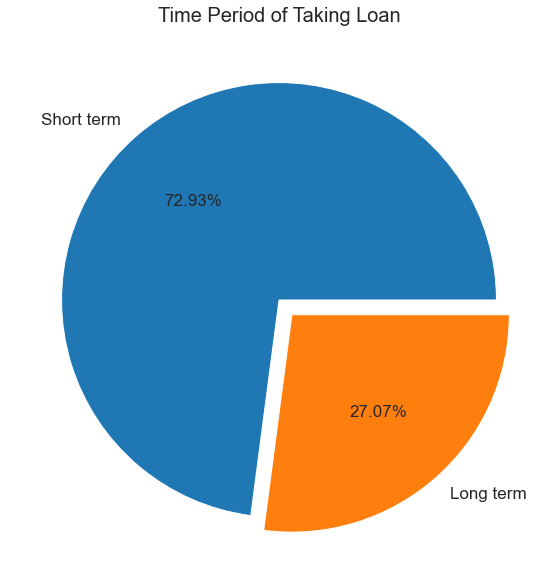

In [27]:
plt.figure(figsize=(10,10))
plt.pie(x=df_EDA['Term_Short Term'].value_counts(),labels=['Short term','Long term'],autopct='%.2f%%',textprops={'fontsize': 17},explode=[0,0.09],)
plt.title('Time Period of Taking Loan',fontdict={'fontsize':20})
plt.show()

In [28]:
df_EDA_Purpose = (df_EDA.groupby(["Purpose"],as_index=False)["Term_Short Term"].count()).sort_values("Purpose", ascending=False)

From the data frame describtion there is a big gap between the Credit_Score min and max values, However, after search, the value of the cridit score can not exceed 800. A closer look to the data that has cridit score more than 900.

In [29]:
df_EDA[df_EDA['Credit_Score'] >= 900]

Loan_ID  \
5       89d8cb0c-e5c2-4f54-b056-48a645c543dd   
43      0c84b81a-e5a9-4a92-8dc8-fb179add03a4   
51      0daecc08-0354-4753-b282-52124b2420df   
56      a5ada080-a058-4ad2-8953-002b7ec1ae31   
65      1704367e-1d71-4551-8d33-49aa15cab4b1   
...                                      ...   
110403  74a97135-d6cc-4db7-8a09-3f8a669b9116   
110454  fd4ab500-e940-4033-9bd8-9f790ced79ab   
110460  655ad379-a042-49f3-8325-d1b11515aee5   
110483  32a96b0b-68d3-4e9c-8aec-443039055540   
110491  b8813050-d2e0-4d07-ae0a-b2dd1e076560   

                                 Customer_ID  Current_Loan_Amount  \
5       4ffe99d3-7f2a-44db-afc1-40943f1f9750             206602.0   
43      628b0914-b1d7-4028-b590-b50f5da53d06             288948.0   
51      2884d362-391a-4941-af69-c825cae18002             219692.0   
56      9966e08c-04a6-41ab-86d0-e4062c64bd41              78012.0   
65      88f97adf-070a-47b1-9657-38276eef7d19             523908.0   
...                                      ...                  ...   
110403  d7ba9039-326b-4b9c-aeab-ba67114377cc             765534.0   
110454  ec53ade5-c44b-4c79-8d4d-188d4df9201a             133870.0   
110460  9eb9305f-e52b-40da-b5fb-ceb7aee99552             124256.0   
110483  936fd7ee-b4cf-4b0d-a3b0-a9ce5670a4c5             243782.0   
110491  c29b7ab0-26bc-4f27-9410-4edc4441be26             668118.0   

        Credit_Score  Annual_Income Years_in_current_job Home_Ownership  \
5             7290.0       896857.0            10+ years  Home Mortgage   
43            7120.0       537472.0            10+ years           Rent   
51            6610.0       527839.0            10+ years           Rent   
56            7380.0       728726.0              4 years           Rent   
65            7370.0      1028774.0              6 years  Home Mortgage   
...              ...            ...                  ...            ...   
110403        7200.0      2455674.0               1 year  Home Mortgage   
110454        7360.0       481745.0              3 years           Rent   
110460        7180.0       714305.0            10+ years       Own Home   
110483        7340.0      1074317.0            10+ years           Rent   
110491        6640.0      1701089.0            10+ years  Home Mortgage   

                   Purpose  Monthly_Debt  Years_of_Credit_History  \
5       Debt Consolidation      16367.74                     17.3   
43      Debt Consolidation       5777.90                     14.8   
51      Debt Consolidation      14207.63                     17.0   
56          major_purchase      10135.36                     11.4   
65      Debt Consolidation      22632.99                     19.3   
...                    ...           ...                      ...   
110403  Debt Consolidation      59345.55                     17.0   
110454  Debt Consolidation      10196.92                      8.0   
110460  Debt Consolidation      19405.46                     11.6   
110483  Debt Consolidation      16383.32                     20.9   
110491  Debt Consolidation      32179.16                     15.3   

        Months_since_last_delinquent  Number_of_Open_Accounts  \
5                                NaN                      6.0   
43                               NaN                      4.0   
51                              48.0                      9.0   
56                               NaN                      8.0   
65                               NaN                      5.0   
...                              ...                      ...   
110403                           NaN                     10.0   
110454                           NaN                     11.0   
110460                          79.0                      9.0   
110483                          51.0                     12.0   
110491                           NaN                     15.0   

        Number_of_Credit_Problems  Current_Credit_Balance  \
5                             0.0                215308.0  

Months_since_last_delinquent and Years_in_current_job columns consist of too many nulls, but in this case null most probably means that the costumer has no delinquent, so it will be filled with zero.

In [30]:
df_EDA['Months_since_last_delinquent'] = df_EDA['Months_since_last_delinquent'].fillna(0)

In [31]:
df_EDA['Years_in_current_job'].isna().sum()

3334

In [32]:
df_EDA['Years_in_current_job'] =df_EDA['Years_in_current_job'].fillna(0)

In [33]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78650 entries, 0 to 110513
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       78650 non-null  object 
 1   Customer_ID                   78650 non-null  object 
 2   Current_Loan_Amount           78650 non-null  float64
 3   Credit_Score                  78650 non-null  float64
 4   Annual_Income                 78650 non-null  float64
 5   Years_in_current_job          78650 non-null  object 
 6   Home_Ownership                78650 non-null  object 
 7   Purpose                       78650 non-null  object 
 8   Monthly_Debt                  78650 non-null  float64
 9   Years_of_Credit_History       78650 non-null  float64
 10  Months_since_last_delinquent  78650 non-null  float64
 11  Number_of_Open_Accounts       78650 non-null  float64
 12  Number_of_Credit_Problems     78650 non-null  float64
 13  

Looking at the correlation between the featurs and the target after filling the nulls.

In [34]:
df_EDA.corr()

Current_Loan_Amount  Credit_Score  \
Current_Loan_Amount                      1.000000     -0.111778   
Credit_Score                            -0.111778      1.000000   
Annual_Income                            0.014154     -0.020347   
Monthly_Debt                            -0.008951     -0.001511   
Years_of_Credit_History                  0.021041     -0.013091   
Months_since_last_delinquent            -0.006907     -0.006775   
Number_of_Open_Accounts                  0.000238      0.005975   
Number_of_Credit_Problems               -0.000897     -0.000018   
Current_Credit_Balance                   0.004025     -0.001182   
Maximum_Open_Credit                     -0.000813     -0.003504   
Bankruptcies                             0.000073     -0.004298   
Tax_Liens                                0.000254      0.006412   
Loan_Status_Fully Paid                   0.216122     -0.376617   
Term_Short Term                          0.067374     -0.046474   

                              Annual_Income  Monthly_Debt  \
Current_Loan_Amount                0.014154     -0.008951   
Credit_Score                      -0.020347     -0.001511   
Annual_Income                      1.000000      0.479878   
Monthly_Debt                       0.479878      1.000000   
Years_of_Credit_History            0.158433      0.197064   
Months_since_last_delinquent       0.013705      0.007857   
Number_of_Open_Accounts            0.145708      0.411041   
Number_of_Credit_Problems         -0.014844     -0.051462   
Current_Credit_Balance             0.300946      0.477005   
Maximum_Open_Credit                0.048452      0.049644   
Bankruptcies                      -0.047845     -0.078792   
Tax_Liens                          0.042607      0.023463   
Loan_Status_Fully Paid             0.047718     -0.010460   
Term_Short Term                   -0.077777     -0.155953   

                              Years_of_Credit_History  \
Current_Loan_Amount                          0.021041   
Credit_Score                                -0.013091   
Annual_Income                                0.158433   
Monthly_Debt                                 0.197064   
Years_of_Credit_History                      1.000000   
Months_since_last_delinquent                 0.089580   
Number_of_Open_Accounts                      0.131840   
Number_of_Credit_Problems                    0.061008   
Current_Credit_Balance                       0.203372   
Maximum_Open_Credit                          0.033132   
Bankruptcies                                 0.063300   
Tax_Liens                                    0.020657   
Loan_Status_Fully Paid                       0.024781   
Term_Short Term                             -0.037328   

                              Months_since_last_delinquent  \
Current_Loan_Amount                              -0.006907   
Credit_Score                                     -0.006775   
Annual_Income                                     0.013705   
Monthly_Debt                                      0.007857   
Years_of_Credit_History                           0.089580   
Months_since_last_delinquent                      1.000000   
Number_of_Open_Accounts                           0.031374   
Number_of_Credit_Problems                         0.078205   
Current_Credit_Balance                           -0.069641   
Maximum_Open_Credit                              -0.010050   
Bankruptcies                                      0.055199   
Tax_Liens                                         0.030000   
Loan_Status_Fully Paid                            0.007775   
Term_Short Term                                   0.004679   

                              Number_of_Open_Accounts  \
Current_Loan_Amount                          0.000238   
Credit_Score                                 0.005975   
Annual_Income                                0.145708   
Monthly_Debt                                 0.411041   
Years_of_Credit_History             

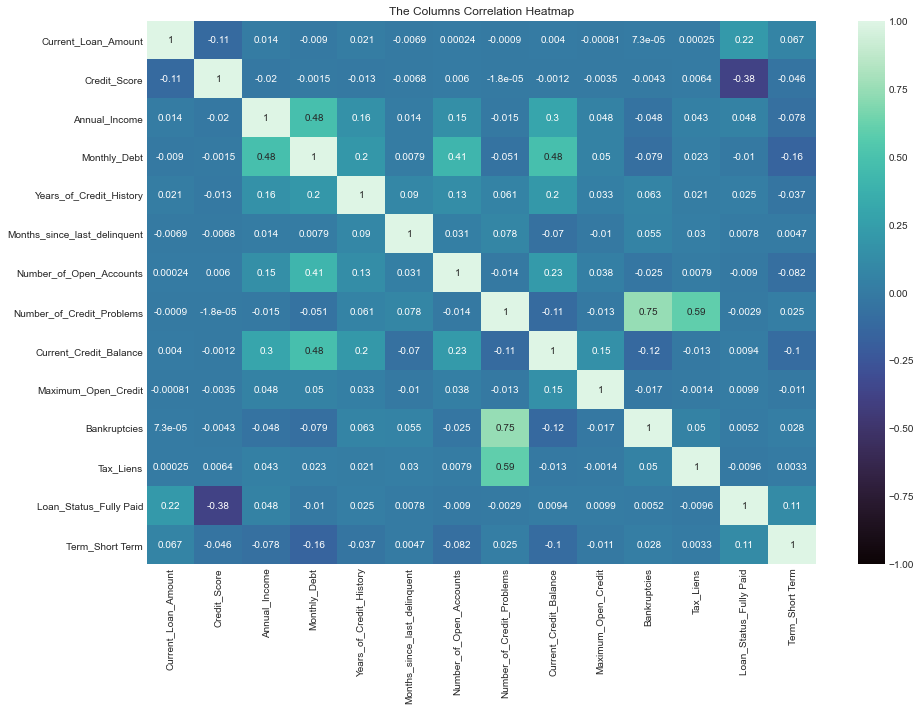

In [35]:
plt.figure(figsize=(15,10))
plt.title('The Columns Correlation Heatmap')
sns.heatmap(df_EDA.corr(),cmap='mako', annot=True, vmin=-1, vmax=1);

Dealing with outliers

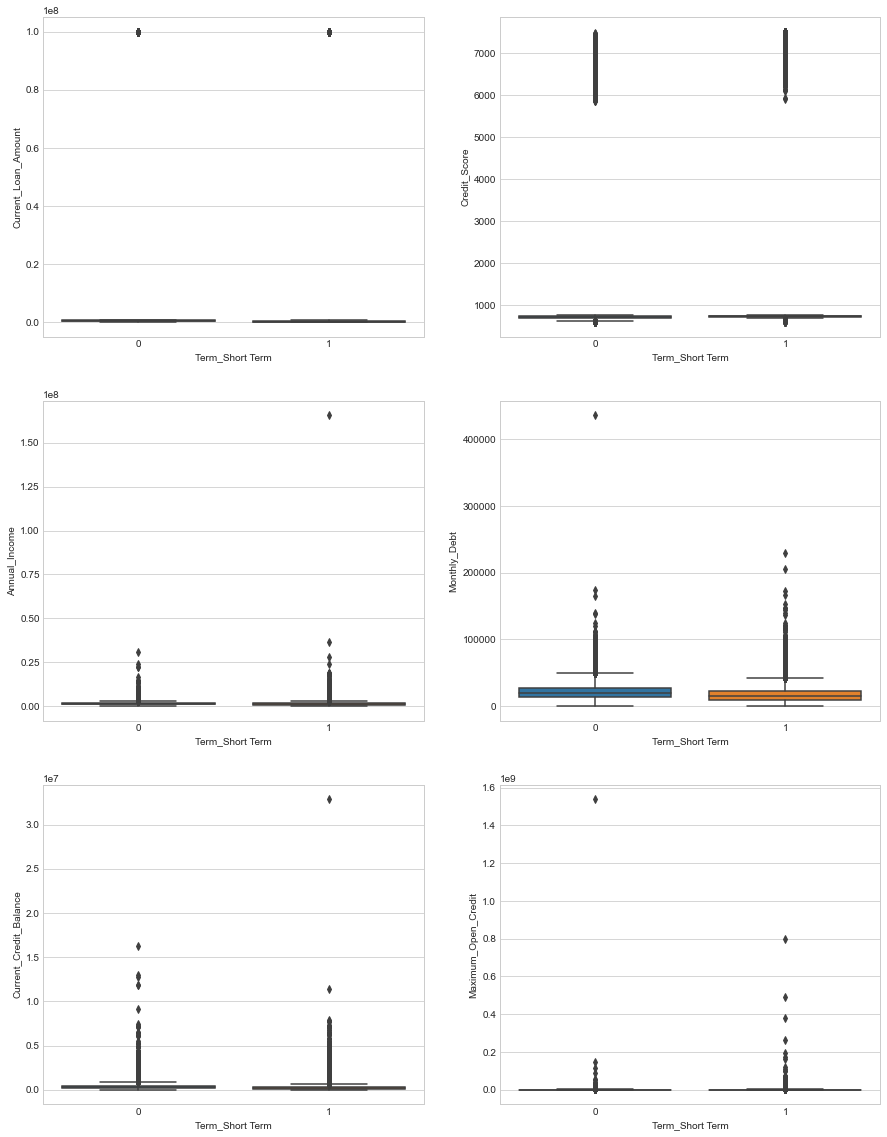

In [36]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Current_Loan_Amount',data=df_EDA.sort_values('Current_Loan_Amount',ascending=False));
#plt.title('34 ST-PENN STA',fontsize = 15 , family='cursive', c = 'r')
plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Credit_Score',data=df_EDA.sort_values('Credit_Score',ascending=False));
#plt.title('GRD CNTRL-42 ST',fontsize = 15 , family='cursive', c = 'r')
plt.subplot(3,2,3)
sns.boxplot(x='Term_Short Term',y='Annual_Income',data=df_EDA.sort_values('Annual_Income',ascending=False));
#plt.title('TIMES SQ-42 ST ',fontsize = 15 , family='cursive', c = 'r')
plt.subplot(3,2,4);
sns.boxplot(x='Term_Short Term',y='Monthly_Debt',data=df_EDA.sort_values('Monthly_Debt',ascending=False));
#plt.title('34 ST-HERALD SQ',fontsize = 15 , family='cursive', c = 'r')
plt.subplot(3,2,5)
sns.boxplot(x='Term_Short Term',y='Current_Credit_Balance',data=df_EDA.sort_values('Current_Credit_Balance',ascending=False));
#plt.title('23 ST',fontsize = 15 , family='cursive', c = 'r')
plt.subplot(3,2,6)
sns.boxplot(x='Term_Short Term',y='Maximum_Open_Credit',data=df_EDA.sort_values('Maximum_Open_Credit',ascending=False));


Above figurs shows the box plot of the featurs versus the loan term type, and it is clear that there are many outliers that will be droped.

Starting with creating a new data frame to avoid changing the original data from to drop the outliers 

In [37]:
df_drop_outliers = df_EDA.copy()

In [38]:
df_drop_outliers

Loan_ID  \
0       14dd8831-6af5-400b-83ec-68e61888a048   
2       4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
3       77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
5       89d8cb0c-e5c2-4f54-b056-48a645c543dd   
6       273581de-85d8-4332-81a5-19b04ce68666   
...                                      ...   
110508  a2701102-3cb0-46a6-8658-e6f20d950182   
110509  c4ab66f9-833c-43b8-879c-4f8bcb64dd14   
110510  bbd3a392-01b4-4e0e-9c28-b2a4a39beac7   
110512  0cc8e0e0-1bc6-49d7-ad0f-0598b647458f   
110513  14f94b64-26c4-48fd-b916-1388d7adcc1d   

                                 Customer_ID  Current_Loan_Amount  \
0       981165ec-3274-42f5-a3b4-d104041a9ca9             445412.0   
2       5efb2b2b-bf11-4dfd-a572-3761a2694725           99999999.0   
3       e777faab-98ae-45af-9a86-7ce5b33b1011             347666.0   
5       4ffe99d3-7f2a-44db-afc1-40943f1f9750             206602.0   
6       90a75dde-34d5-419c-90dc-1e58b04b3e35             217646.0   
...                                      ...                  ...   
110508  6dc5fa63-93f4-43a9-8192-2df57548287b             442596.0   
110509  8ee2002b-8fb6-4af0-ab74-25a1c23e7647             157806.0   
110510  6c306306-f5c2-4db5-b74a-af2895123ecb             132550.0   
110512  f90cf410-a34b-49e7-8af9-2b405e17b827           99999999.0   
110513  f1838fa9-7ad9-44d5-97a6-7a6d3f3529d7           99999999.0   

        Credit_Score  Annual_Income Years_in_current_job Home_Ownership  \
0              709.0      1167493.0              8 years  Home Mortgage   
2              741.0      2231892.0              8 years       Own Home   
3              721.0       806949.0              3 years       Own Home   
5             7290.0       896857.0            10+ years  Home Mortgage   
6              730.0      1184194.0             < 1 year  Home Mortgage   
...              ...            ...                  ...            ...   
110508         739.0      1528968.0              7 years  Home Mortgage   
110509         731.0      1514376.0              6 years           Rent   
110510         718.0       763192.0              4 years  Home Mortgage   
110512         721.0       972097.0            10+ years  Home Mortgage   
110513         748.0      1079960.0              6 years  Home Mortgage   

                   Purpose  Monthly_Debt  Years_of_Credit_History  \
0        Home Improvements       5214.74                     17.2   
2       Debt Consolidation      29200.53                     14.9   
3       Debt Consolidation       8741.90                     12.0   
5       Debt Consolidation      16367.74                     17.3   
6       Debt Consolidation      10855.08                     19.6   
...                    ...           ...                      ...   
110508  Debt Consolidation      19494.38                     16.7   
110509  Debt Consolidation       4795.41                     12.5   
110510  Debt Consolidation      12401.87                      9.9   
110512  Debt Consolidation      12232.20                     16.8   
110513  Debt Consolidation      12239.61                     19.7   

        Months_since_last_delinquent  Number_of_Open_Accounts  \
0                                0.0                      6.0   
2                               29.0                     18.0   
3                                0.0                      9.0   
5                                0.0                      6.0   
6                               10.0                     13.0   
...                              ...                      ...   
110508                          79.0                     11.0   
110509                           0.0                      9.0   
110510                          20.0                      8.0   
110512                          24.0                      8.0   
110513                           0.0                     14.0   

        Number_of_Credit_Problems  Current_Credit_Balance  \
0                             1.0                228190.0  

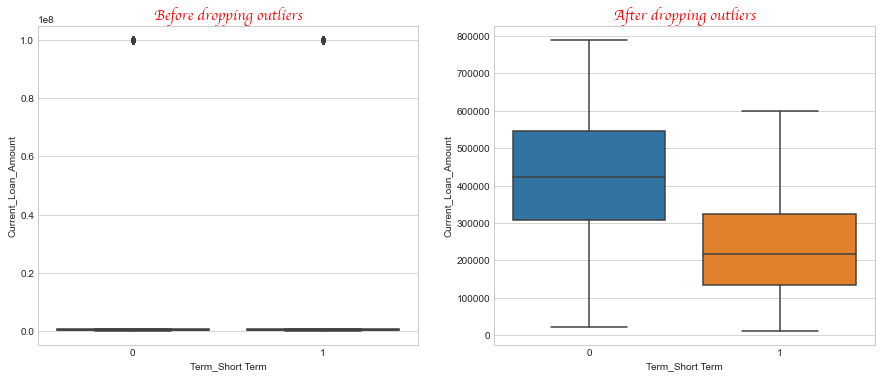

In [39]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Current_Loan_Amount',data=df_EDA.sort_values('Current_Loan_Amount',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , family='cursive', c = 'r')

df_drop_outliers = df_drop_outliers[df_drop_outliers['Current_Loan_Amount'] != 99999999]
df_drop_outliers = df_drop_outliers[((df_drop_outliers['Current_Loan_Amount'] <= 600000 )& (df_drop_outliers['Term_Short Term']==1))| (df_drop_outliers['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Current_Loan_Amount',data=df_drop_outliers.sort_values('Current_Loan_Amount',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , family='cursive', c = 'r');

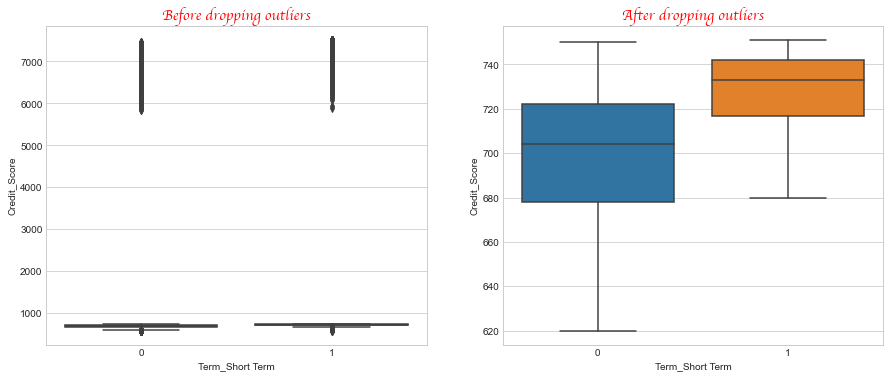

In [40]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Credit_Score',data=df_EDA.sort_values('Credit_Score',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , family='cursive', c = 'r')

df_drop_outliers = df_drop_outliers.loc[df_drop_outliers['Credit_Score'] <= 1500,:]
df_drop_outliers = df_drop_outliers.loc[df_drop_outliers['Credit_Score'] >= 620 ,:]
df_drop_outliers = df_drop_outliers[((df_drop_outliers['Credit_Score'] >= 680 )& (df_drop_outliers['Term_Short Term']==1))| (df_drop_outliers['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Credit_Score',data=df_drop_outliers.sort_values('Credit_Score',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , family='cursive', c = 'r');

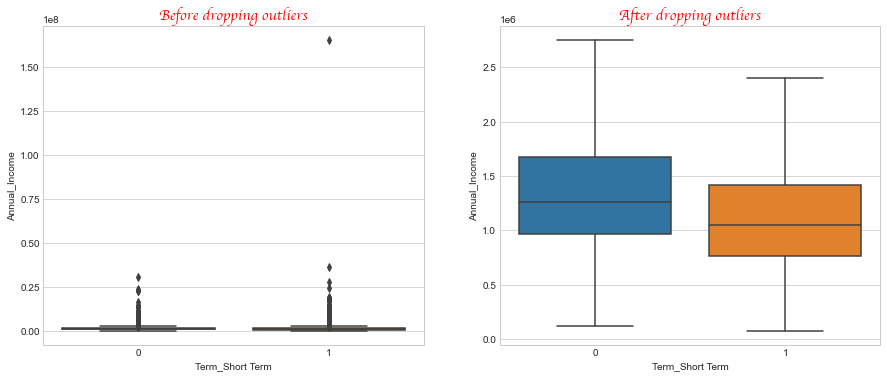

In [41]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Annual_Income',data=df_EDA.sort_values('Annual_Income',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , family='cursive', c = 'r')

df_drop_outliers = df_drop_outliers.loc[df_drop_outliers['Annual_Income'] <= 2750000,:]
df_drop_outliers = df_drop_outliers[((df_drop_outliers['Annual_Income'] <= 2400000 )& (df_drop_outliers['Term_Short Term']==1))| (df_drop_outliers['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Annual_Income',data=df_drop_outliers.sort_values('Annual_Income',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , family='cursive', c = 'r');

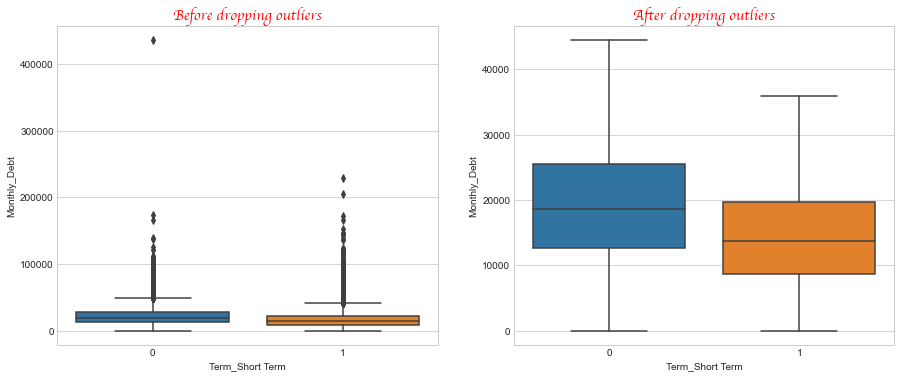

In [42]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Monthly_Debt',data=df_EDA.sort_values('Monthly_Debt',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , family='cursive', c = 'r')

df_drop_outliers = df_drop_outliers.loc[df_drop_outliers['Monthly_Debt'] <= 44500,:]
df_drop_outliers = df_drop_outliers[((df_drop_outliers['Monthly_Debt'] <= 36000 )& (df_drop_outliers['Term_Short Term']==1))| (df_drop_outliers['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Monthly_Debt',data=df_drop_outliers.sort_values('Monthly_Debt',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , family='cursive', c = 'r');

In [43]:
df_drop_outliers = df_drop_outliers.loc[df_drop_outliers['Months_since_last_delinquent'] <= 85,:]

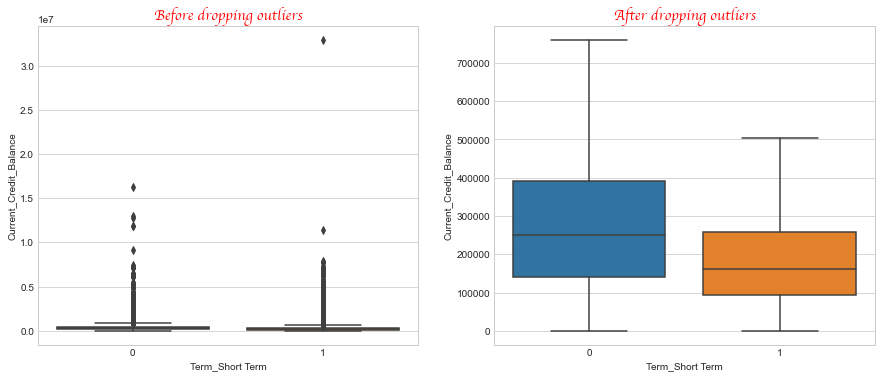

In [44]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Current_Credit_Balance',data=df_EDA.sort_values('Current_Credit_Balance',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , family='cursive', c = 'r')

df_drop_outliers = df_drop_outliers.loc[df_drop_outliers['Current_Credit_Balance'] <= 760000,:]
df_drop_outliers = df_drop_outliers[((df_drop_outliers['Current_Credit_Balance'] <= 504000 )& (df_drop_outliers['Term_Short Term']==1))| (df_drop_outliers['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Current_Credit_Balance',data=df_drop_outliers.sort_values('Current_Credit_Balance',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , family='cursive', c = 'r');

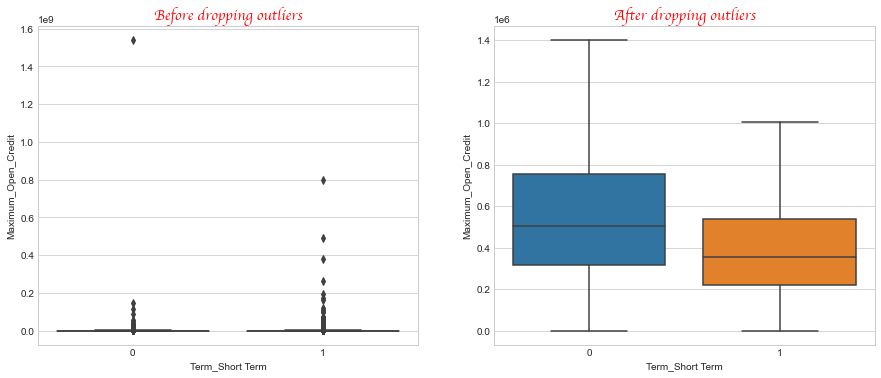

In [45]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Maximum_Open_Credit',data=df_EDA.sort_values('Maximum_Open_Credit',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , family='cursive', c = 'r')

df_drop_outliers = df_drop_outliers.loc[df_drop_outliers['Maximum_Open_Credit'] <= 1400000,:]
df_drop_outliers = df_drop_outliers[((df_drop_outliers['Maximum_Open_Credit'] <= 1006000 )& (df_drop_outliers['Term_Short Term']==1))| (df_drop_outliers['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Maximum_Open_Credit',data=df_drop_outliers.sort_values('Maximum_Open_Credit',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , family='cursive', c = 'r');

In [46]:
df_drop_outliers

Loan_ID  \
0       14dd8831-6af5-400b-83ec-68e61888a048   
3       77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
6       273581de-85d8-4332-81a5-19b04ce68666   
14      2e841c8f-3dc1-464d-91c1-3d3d51e64c38   
19      41f7dd8d-bfdd-43de-859a-2ce215aa4c07   
...                                      ...   
110506  4d0d0e65-e9aa-43e4-8de0-8aa2869a9983   
110507  6f0b1e02-d222-4227-9161-b0c4fff4dd76   
110508  a2701102-3cb0-46a6-8658-e6f20d950182   
110509  c4ab66f9-833c-43b8-879c-4f8bcb64dd14   
110510  bbd3a392-01b4-4e0e-9c28-b2a4a39beac7   

                                 Customer_ID  Current_Loan_Amount  \
0       981165ec-3274-42f5-a3b4-d104041a9ca9             445412.0   
3       e777faab-98ae-45af-9a86-7ce5b33b1011             347666.0   
6       90a75dde-34d5-419c-90dc-1e58b04b3e35             217646.0   
14      2ac05980-7848-4692-89ae-9321afe650f8             234124.0   
19      422f9b72-5041-407c-8ac4-982213deacd1             390390.0   
...                                      ...                  ...   
110506  add5361a-e612-4c58-bd7d-414543250ebc             428604.0   
110507  879d5bf4-6597-4f2b-ae7c-9deb68537c88             220858.0   
110508  6dc5fa63-93f4-43a9-8192-2df57548287b             442596.0   
110509  8ee2002b-8fb6-4af0-ab74-25a1c23e7647             157806.0   
110510  6c306306-f5c2-4db5-b74a-af2895123ecb             132550.0   

        Credit_Score  Annual_Income Years_in_current_job Home_Ownership  \
0              709.0      1167493.0              8 years  Home Mortgage   
3              721.0       806949.0              3 years       Own Home   
6              730.0      1184194.0             < 1 year  Home Mortgage   
14             727.0       693234.0            10+ years           Rent   
19             747.0      1791738.0              8 years  Home Mortgage   
...              ...            ...                  ...            ...   
110506         697.0      2183043.0              6 years  Home Mortgage   
110507         737.0      1234088.0             < 1 year           Rent   
110508         739.0      1528968.0              7 years  Home Mortgage   
110509         731.0      1514376.0              6 years           Rent   
110510         718.0       763192.0              4 years  Home Mortgage   

                   Purpose  Monthly_Debt  Years_of_Credit_History  \
0        Home Improvements       5214.74                     17.2   
3       Debt Consolidation       8741.90                     12.0   
6       Debt Consolidation      10855.08                     19.6   
14      Debt Consolidation      14211.24                     24.7   
19       Home Improvements       2478.55                     22.7   
...                    ...           ...                      ...   
110506  Debt Consolidation      16882.07                     22.1   
110507  Debt Consolidation      20362.49                      9.5   
110508  Debt Consolidation      19494.38                     16.7   
110509  Debt Consolidation       4795.41                     12.5   
110510  Debt Consolidation      12401.87                      9.9   

        Months_since_last_delinquent  Number_of_Open_Accounts  \
0                                0.0                      6.0   
3                                0.0                      9.0   
6                               10.0                     13.0   
14                              46.0                     10.0   
19                               0.0                      6.0   
...                              ...                      ...   
110506                           0.0                     10.0   
110507                           0.0                     10.0   
110508                          79.0                     11.0   
110509                           0.0                      9.0   
110510                          20.0                      8.0   

        Number_of_Credit_Problems  Current_Credit_Balance  \
0                             1.0                228190.0  

After dropping the outliers the data set now has 45589 rows

Checking the values of the Purpose column

In [47]:
df_drop_outliers.Purpose.unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Take a Trip', 'Other', 'Business Loan', 'Buy a Car',
       'small_business', 'vacation', 'major_purchase', 'Medical Bills',
       'Educational Expenses', 'wedding', 'moving', 'renewable_energy'],
      dtype=object)

It is clear that there are two values "other" and "Other", one of them will be replaced by the other

In [48]:
df_drop_outliers.Purpose = df_drop_outliers.Purpose.str.replace('other','Other')

Check the correlation after dropping outliers

In [49]:
df_drop_outliers.corr()

Current_Loan_Amount  Credit_Score  \
Current_Loan_Amount                      1.000000     -0.318159   
Credit_Score                            -0.318159      1.000000   
Annual_Income                            0.458005     -0.064117   
Monthly_Debt                             0.414539     -0.173881   
Years_of_Credit_History                  0.112700      0.041384   
Months_since_last_delinquent            -0.002803     -0.049081   
Number_of_Open_Accounts                  0.167475     -0.075618   
Number_of_Credit_Problems               -0.063956     -0.034072   
Current_Credit_Balance                   0.470159     -0.146242   
Maximum_Open_Credit                      0.424699      0.009780   
Bankruptcies                            -0.076645     -0.022971   
Tax_Liens                                0.007334     -0.017102   
Loan_Status_Fully Paid                  -0.059103      0.121983   
Term_Short Term                         -0.555375      0.533459   

                              Annual_Income  Monthly_Debt  \
Current_Loan_Amount                0.458005      0.414539   
Credit_Score                      -0.064117     -0.173881   
Annual_Income                      1.000000      0.505152   
Monthly_Debt                       0.505152      1.000000   
Years_of_Credit_History            0.156891      0.118073   
Months_since_last_delinquent       0.071816      0.040416   
Number_of_Open_Accounts            0.157283      0.400332   
Number_of_Credit_Problems          0.009769     -0.023401   
Current_Credit_Balance             0.277830      0.447131   
Maximum_Open_Credit                0.263145      0.336894   
Bankruptcies                      -0.008377     -0.034300   
Tax_Liens                          0.029313      0.015126   
Loan_Status_Fully Paid             0.057655     -0.035071   
Term_Short Term                   -0.236347     -0.270338   

                              Years_of_Credit_History  \
Current_Loan_Amount                          0.112700   
Credit_Score                                 0.041384   
Annual_Income                                0.156891   
Monthly_Debt                                 0.118073   
Years_of_Credit_History                      1.000000   
Months_since_last_delinquent                 0.124955   
Number_of_Open_Accounts                      0.070810   
Number_of_Credit_Problems                    0.103525   
Current_Credit_Balance                       0.155983   
Maximum_Open_Credit                          0.164435   
Bankruptcies                                 0.113313   
Tax_Liens                                    0.017940   
Loan_Status_Fully Paid                       0.006764   
Term_Short Term                             -0.065773   

                              Months_since_last_delinquent  \
Current_Loan_Amount                              -0.002803   
Credit_Score                                     -0.049081   
Annual_Income                                     0.071816   
Monthly_Debt                                      0.040416   
Years_of_Credit_History                           0.124955   
Months_since_last_delinquent                      1.000000   
Number_of_Open_Accounts                           0.056919   
Number_of_Credit_Problems                         0.077397   
Current_Credit_Balance                           -0.075552   
Maximum_Open_Credit                              -0.071234   
Bankruptcies                                      0.054156   
Tax_Liens                                         0.029585   
Loan_Status_Fully Paid                            0.011810   
Term_Short Term                                   0.009563   

                              Number_of_Open_Accounts  \
Current_Loan_Amount                          0.167475   
Credit_Score                                -0.075618   
Annual_Income                                0.157283   
Monthly_Debt                                 0.400332   
Years_of_Credit_History             

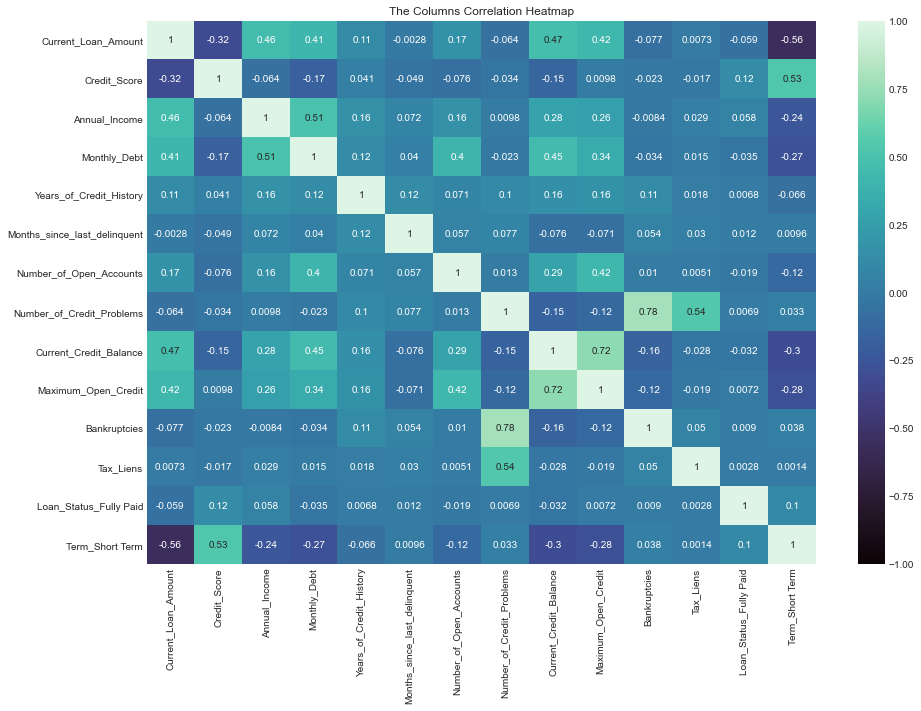

In [50]:
plt.figure(figsize=(15,10))
plt.title('The Columns Correlation Heatmap')
sns.heatmap(df_drop_outliers.corr(),cmap='mako', annot=True, vmin=-1, vmax=1);

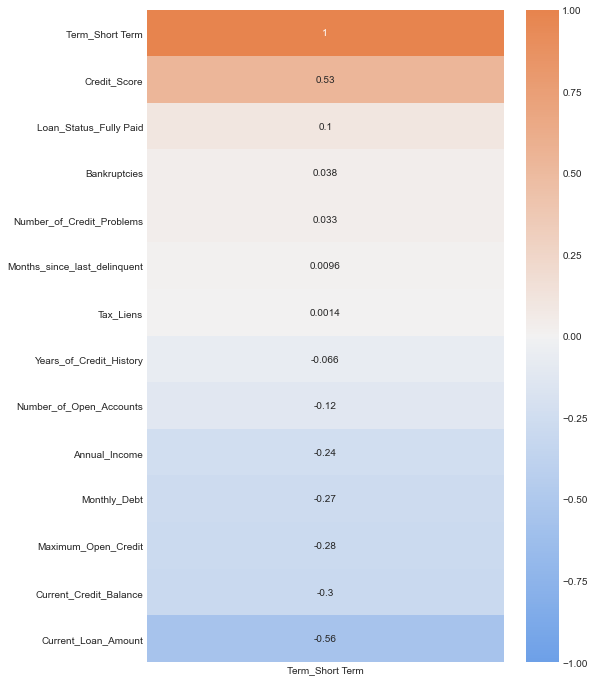

In [51]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_drop_outliers.corr()[['Term_Short Term']].sort_values(by='Term_Short Term', ascending=False), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(250, 30, l=65, as_cmap=True))

It is clear that the correlation has been improved after dropping the outliers, but there are some columns that has a very low correlation with the target. Next step will be checking baseline model after dealing with outliers.

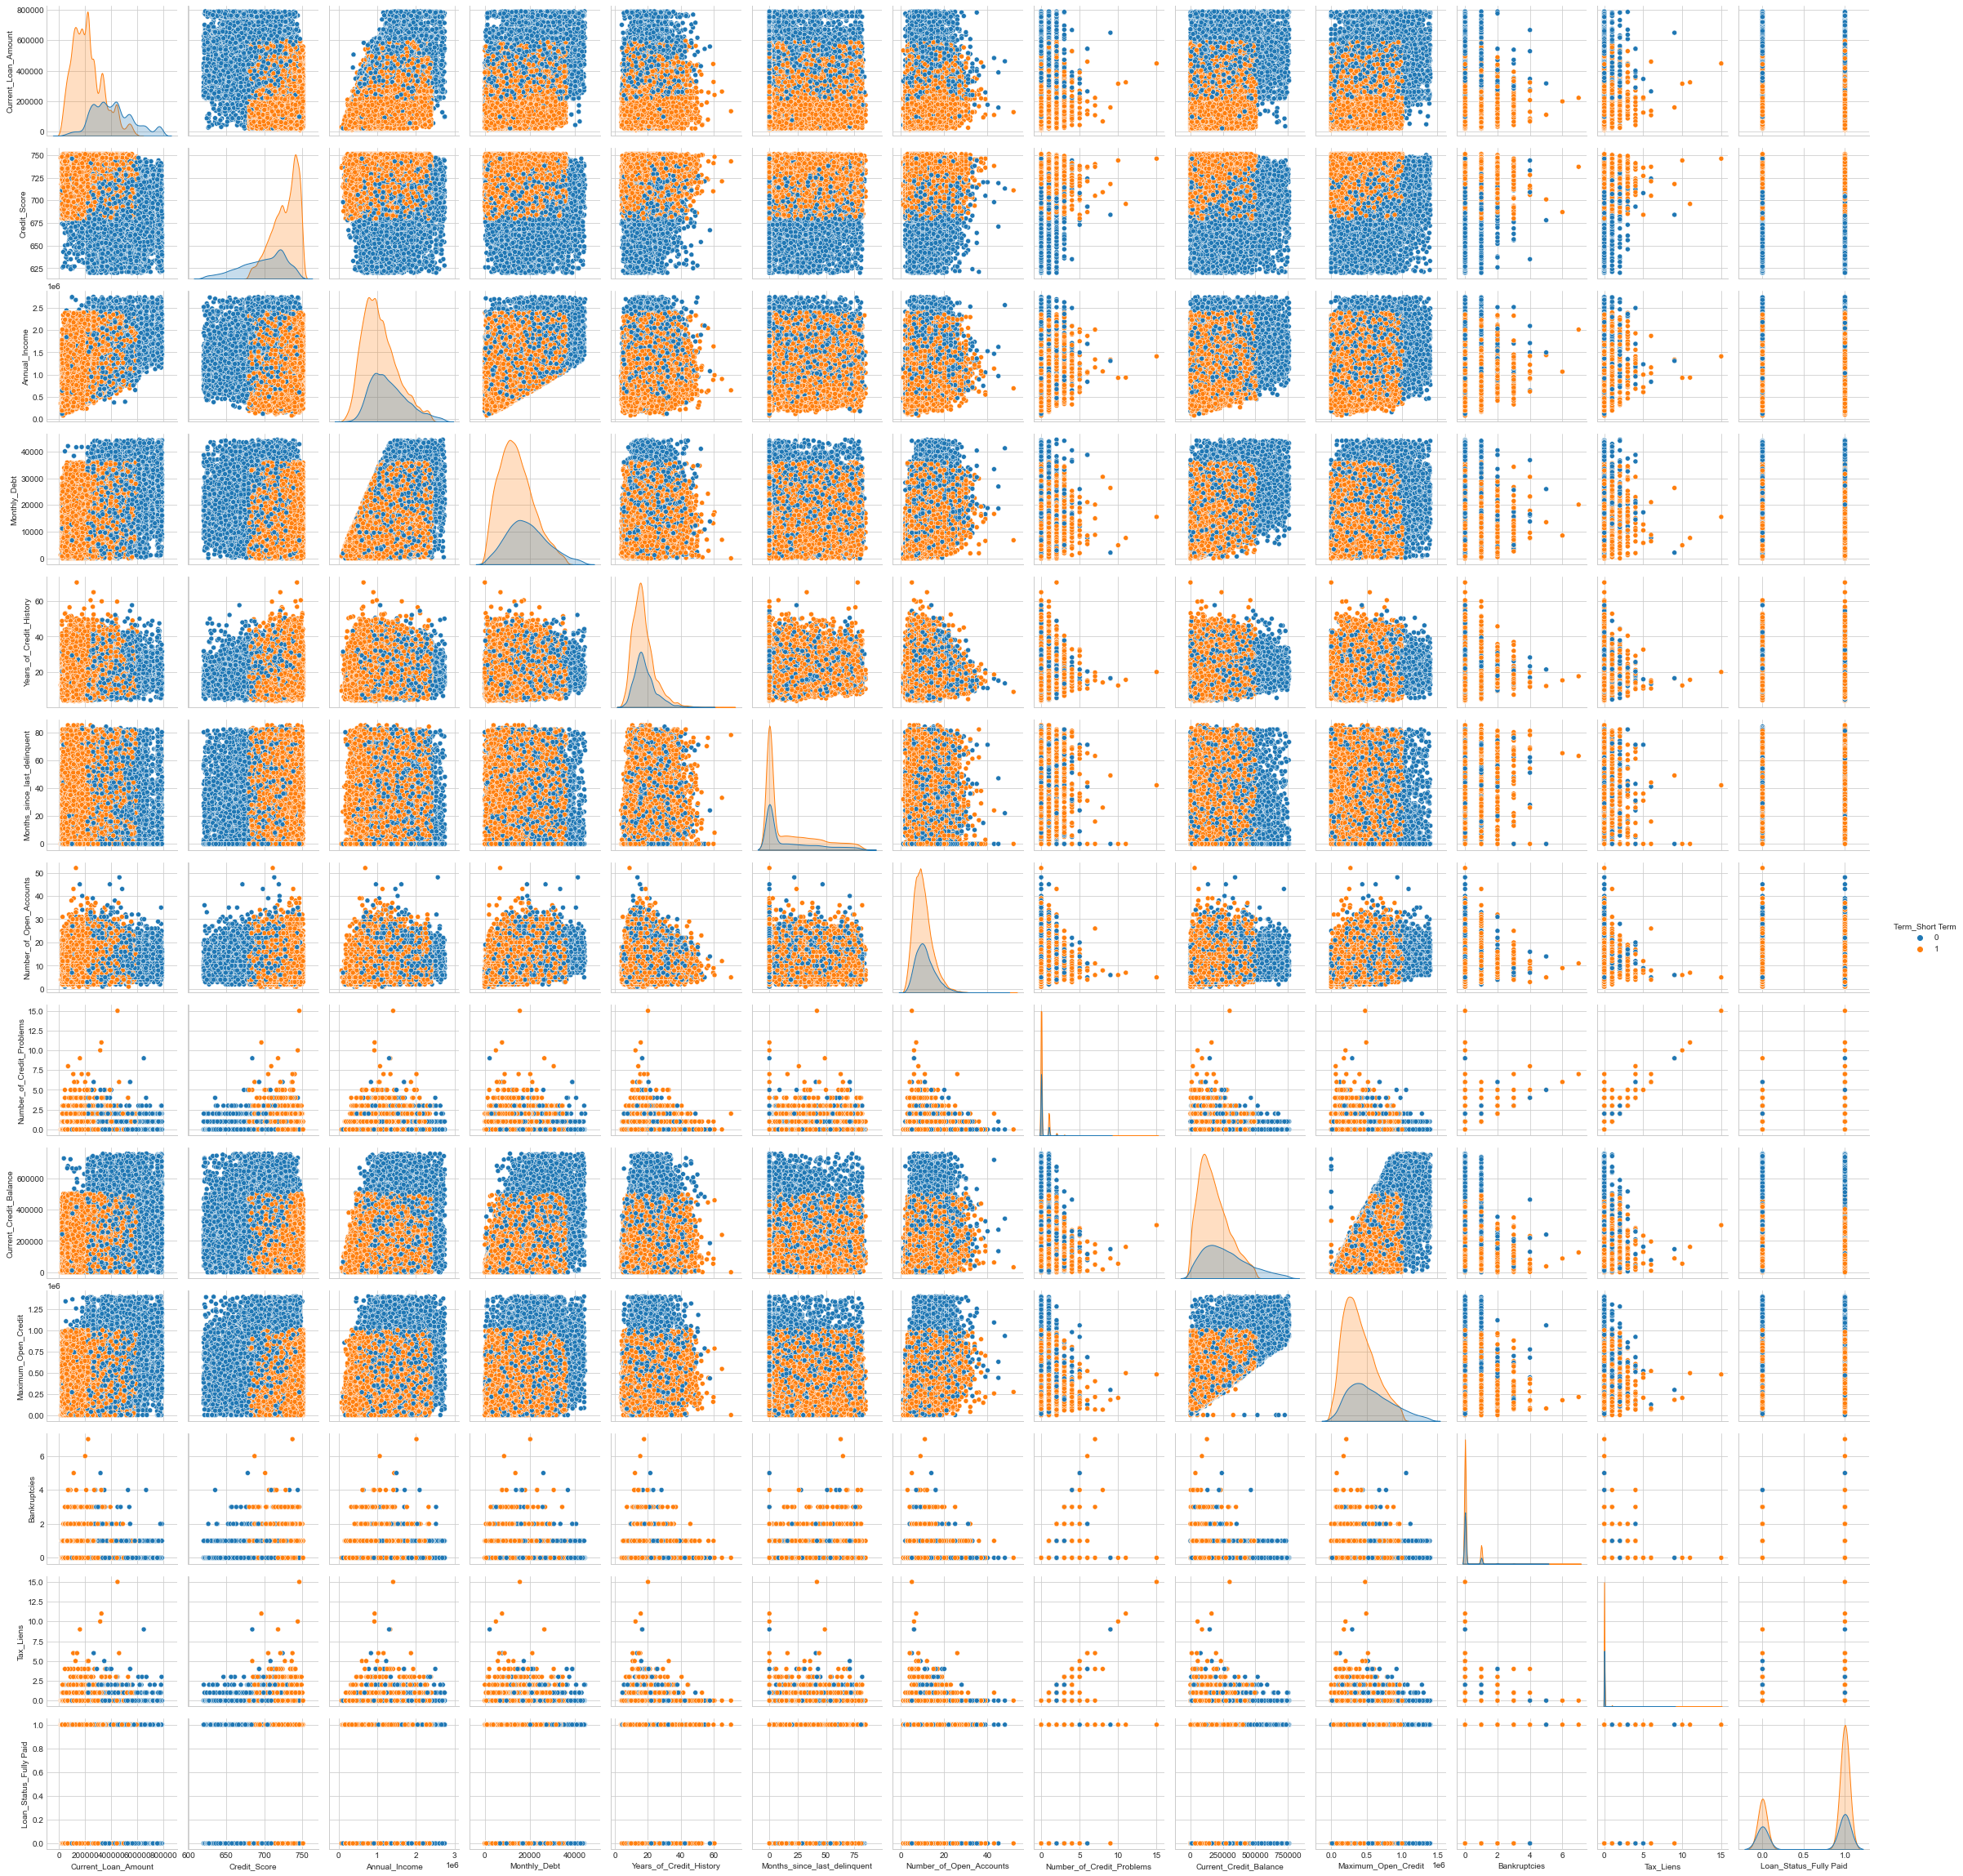

In [52]:
sns.pairplot(df_drop_outliers, hue = 'Term_Short Term');

Check if there are dublicated Loan ID.

In [53]:
df_drop_outliers["Loan_ID"].value_counts().sort_values(ascending=False)

35f895a2-8a8f-4596-a66f-a73c3d194bcf    2
6c2e0c7e-4313-4f2a-a56f-b0ad9df3ad02    2
743f1d24-1bd1-42d4-b605-6deccb412c71    2
8802227d-5c24-4840-aaff-f98572e12685    2
733df7cf-7d42-49c6-b1f7-6f24eb8da614    2
                                       ..
fee5af08-223b-43f7-a692-7c71d1064628    1
ed5a8f56-ae32-4ec6-a677-3f8e3edd4799    1
bbc76def-bdac-4b3d-9c24-0f0cd79105d3    1
d613f641-7cb6-4583-aa15-1609e5e7b616    1
98d1b4aa-54bb-44fb-8e79-a2411e5828a7    1
Name: Loan_ID, Length: 44042, dtype: int64

In [54]:
df_drop_outliers.Loan_ID.duplicated().sum()

1544

Since there are many repated loan ids, closer look into the data set needed.

In [55]:
df_drop_outliers[df_drop_outliers['Loan_ID'] == '53bf4fc0-8951-4329-9965-a81a852df395']

Loan_ID  \
6709    53bf4fc0-8951-4329-9965-a81a852df395   
110475  53bf4fc0-8951-4329-9965-a81a852df395   

                                 Customer_ID  Current_Loan_Amount  \
6709    0d58dc49-dd92-4887-8117-0094d2e8ea56              62304.0   
110475  0d58dc49-dd92-4887-8117-0094d2e8ea56              62304.0   

        Credit_Score  Annual_Income Years_in_current_job Home_Ownership  \
6709           722.0       999172.0            10+ years           Rent   
110475         722.0       999172.0            10+ years           Rent   

                   Purpose  Monthly_Debt  Years_of_Credit_History  \
6709    Debt Consolidation       8184.82                     18.7   
110475  Debt Consolidation       8184.82                     18.7   

        Months_since_last_delinquent  Number_of_Open_Accounts  \
6709                             9.0                      4.0   
110475                           9.0                      4.0   

        Number_of_Credit_Problems  Current_Credit_Balance  \
6709                          1.0                 46474.0   
110475                        1.0                 46474.0   

        Maximum_Open_Credit  Bankruptcies  Tax_Liens  Loan_Status_Fully Paid  \
6709                79134.0           1.0        0.0                       1   
110475              79134.0           1.0        0.0                       0   

        Term_Short Term  
6709                  1  
110475                1

The reasone for the repetition becouse the loan status has been changed from charged off to fully paid

Dropping the duplicat loan id and keepin only the fully paid loans.

In [56]:
df_drop_outliers = df_drop_outliers[~((df_drop_outliers.Loan_ID.duplicated()) & (df_drop_outliers['Loan_Status_Fully Paid'] == 0)) ]

In [57]:
df_drop_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44042 entries, 0 to 110509
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       44042 non-null  object 
 1   Customer_ID                   44042 non-null  object 
 2   Current_Loan_Amount           44042 non-null  float64
 3   Credit_Score                  44042 non-null  float64
 4   Annual_Income                 44042 non-null  float64
 5   Years_in_current_job          44042 non-null  object 
 6   Home_Ownership                44042 non-null  object 
 7   Purpose                       44042 non-null  object 
 8   Monthly_Debt                  44042 non-null  float64
 9   Years_of_Credit_History       44042 non-null  float64
 10  Months_since_last_delinquent  44042 non-null  float64
 11  Number_of_Open_Accounts       44042 non-null  float64
 12  Number_of_Credit_Problems     44042 non-null  float64
 13  

Now all the featurs will catigrical columns will be converted into dummies

In [58]:
df_baseline_after_EDA = pd.get_dummies(df_drop_outliers.drop(['Loan_ID','Customer_ID'], axis =1), drop_first=True)

Checking the nulls

In [59]:
df_baseline_after_EDA.isna().sum()

Current_Loan_Amount                0
Credit_Score                       0
Annual_Income                      0
Monthly_Debt                       0
Years_of_Credit_History            0
Months_since_last_delinquent       0
Number_of_Open_Accounts            0
Number_of_Credit_Problems          0
Current_Credit_Balance             0
Maximum_Open_Credit                0
Bankruptcies                      85
Tax_Liens                          1
Loan_Status_Fully Paid             0
Term_Short Term                    0
Years_in_current_job_1 year        0
Years_in_current_job_10+ years     0
Years_in_current_job_2 years       0
Years_in_current_job_3 years       0
Years_in_current_job_4 years       0
Years_in_current_job_5 years       0
Years_in_current_job_6 years       0
Years_in_current_job_7 years       0
Years_in_current_job_8 years       0
Years_in_current_job_9 years       0
Years_in_current_job_< 1 year      0
Home_Ownership_Home Mortgage       0
Home_Ownership_Own Home            0
H

Dropping nulls

In [60]:
df_baseline_after_EDA = df_baseline_after_EDA.dropna()
df_baseline_after_EDA.isna().sum()

Current_Loan_Amount               0
Credit_Score                      0
Annual_Income                     0
Monthly_Debt                      0
Years_of_Credit_History           0
Months_since_last_delinquent      0
Number_of_Open_Accounts           0
Number_of_Credit_Problems         0
Current_Credit_Balance            0
Maximum_Open_Credit               0
Bankruptcies                      0
Tax_Liens                         0
Loan_Status_Fully Paid            0
Term_Short Term                   0
Years_in_current_job_1 year       0
Years_in_current_job_10+ years    0
Years_in_current_job_2 years      0
Years_in_current_job_3 years      0
Years_in_current_job_4 years      0
Years_in_current_job_5 years      0
Years_in_current_job_6 years      0
Years_in_current_job_7 years      0
Years_in_current_job_8 years      0
Years_in_current_job_9 years      0
Years_in_current_job_< 1 year     0
Home_Ownership_Home Mortgage      0
Home_Ownership_Own Home           0
Home_Ownership_Rent         

In [61]:
df_baseline_after_EDA.to_pickle("./ready_df.pkl")


Plotting the pie plot for the Term after cleaning the data, and it is clear that it did not changed much.

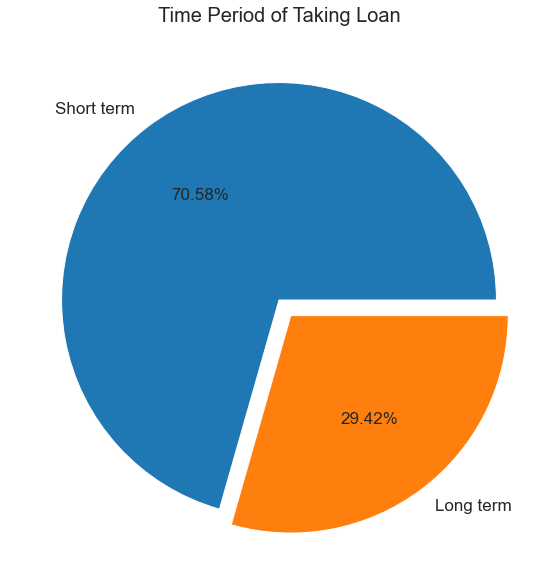

In [62]:
plt.figure(figsize=(10,10))
plt.pie(x=df_baseline_after_EDA['Term_Short Term'].value_counts(),labels=['Short term','Long term'],autopct='%.2f%%',textprops={'fontsize': 17},explode=[0,0.09],)
plt.title('Time Period of Taking Loan',fontdict={'fontsize':20})
plt.show()

Plotting the purpose count of taking loan for both short term and long term

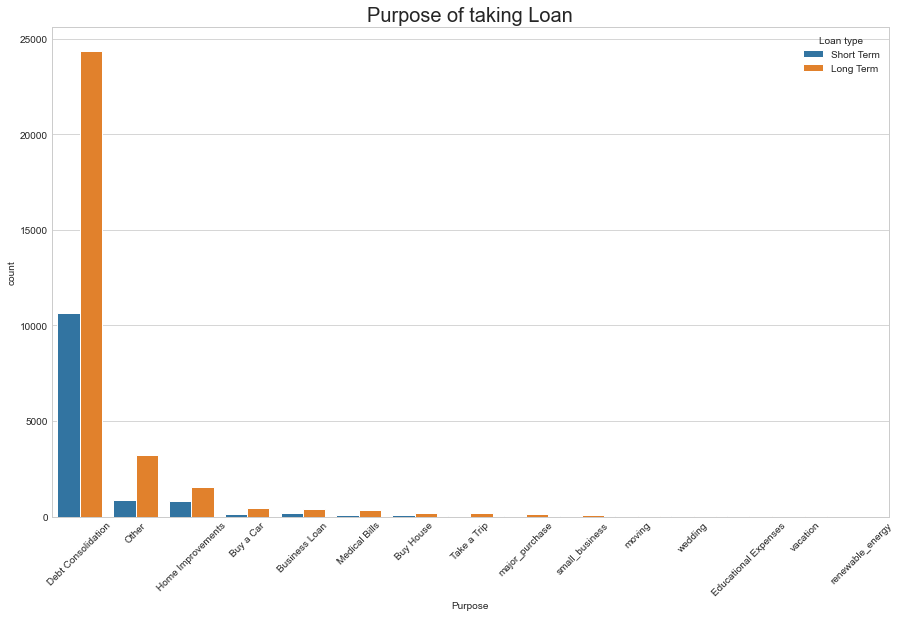

In [63]:
plt.figure(figsize=(15,9))
sns.countplot(x='Purpose' , data=df_drop_outliers ,order = df_drop_outliers['Purpose'].value_counts().index, hue='Term_Short Term')
plt.xticks(rotation=45)
plt.title('Purpose of taking Loan' , fontdict={'fontsize':20});
plt.legend(title="Loan type", loc="upper right", labels=["Short Term","Long Term"])

Plotting the costumers Home ownership for both short term and long term.

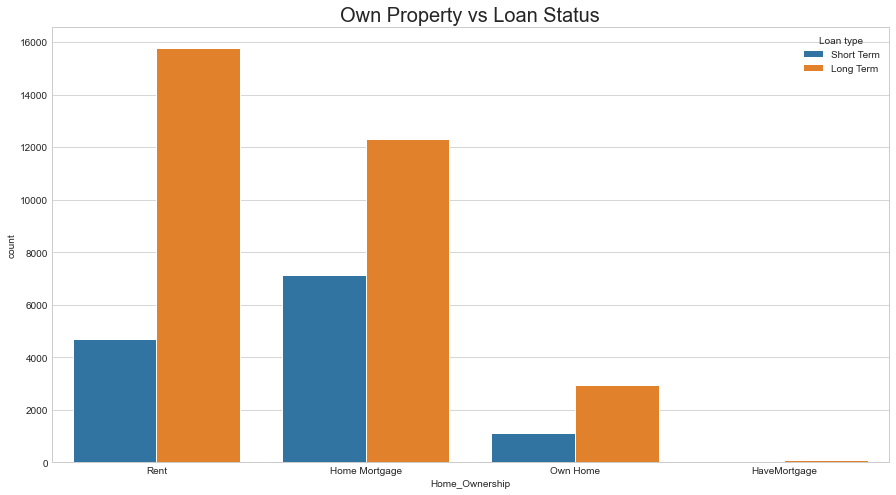

In [64]:
plt.figure(figsize=(15,8))
sns.countplot(x='Home_Ownership',data=df_drop_outliers ,order = df_drop_outliers['Home_Ownership'].value_counts().index ,hue='Term_Short Term')
plt.title('Own Property vs Loan Status',fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="upper right", labels=["Short Term","Long Term"])

# Logistic Regression

Starting by splitting the data into three parts: train 80% , validation 10% , test 10%.

In [65]:
features = df_baseline_after_EDA.drop('Term_Short Term',axis = 1)
target = df_baseline_after_EDA['Term_Short Term']
X , X_test, y , y_test = train_test_split(features , target, test_size = 0.1 , random_state = 42)
X_train , X_val, y_train , y_val = train_test_split(X,y, test_size = 0.11 , random_state = 42)

In [66]:
LR_CLF = LogisticRegression(solver='liblinear')# setting C very high essentially removes regularization
LR_CLF.fit(X_train, y_train)

print('The accuracy for training : ',LR_CLF.score(X_train,y_train))
print('The accuracy for validation: ',LR_CLF.score(X_val,y_val))
print('f1_score for train: ',f1_score(LR_CLF.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(LR_CLF.predict(X_val), y_val))

The accuracy for training :  0.8019540458405521
The accuracy for validation:  0.7902113970588235
f1_score for train:  0.8667672965588398
f1_score for validation:  0.8607170099160947


The baseline model has been improved after cleaning the data.

# Feature Engineering

In this part of the notebook, the accuricy of the baseline model will be increased by doing some feature engineering works. But before that a new copy of the data frame will be made.

In [67]:
df_baseline_after_EDA_FE = df_baseline_after_EDA.copy()

In [68]:
df_baseline_after_EDA_FE

Current_Loan_Amount  Credit_Score  Annual_Income  Monthly_Debt  \
0                  445412.0         709.0      1167493.0       5214.74   
3                  347666.0         721.0       806949.0       8741.90   
6                  217646.0         730.0      1184194.0      10855.08   
14                 234124.0         727.0       693234.0      14211.24   
19                 390390.0         747.0      1791738.0       2478.55   
...                     ...           ...            ...           ...   
110503             110946.0         736.0       632396.0      13122.16   
110506             428604.0         697.0      2183043.0      16882.07   
110507             220858.0         737.0      1234088.0      20362.49   
110508             442596.0         739.0      1528968.0      19494.38   
110509             157806.0         731.0      1514376.0       4795.41   

        Years_of_Credit_History  Months_since_last_delinquent  \
0                          17.2                           0.0   
3                          12.0                           0.0   
6                          19.6                          10.0   
14                         24.7                          46.0   
19                         22.7                           0.0   
...                         ...                           ...   
110503                     14.1                          48.0   
110506                     22.1                           0.0   
110507                      9.5                           0.0   
110508                     16.7                          79.0   
110509                     12.5                           0.0   

        Number_of_Open_Accounts  Number_of_Credit_Problems  \
0                           6.0                        1.0   
3                           9.0                        0.0   
6                          13.0                        1.0   
14                         10.0                        1.0   
19                          6.0                        0.0   
...                         ...                        ...   
110503                     17.0                        0.0   
110506                     10.0                        0.0   
110507                     10.0                        0.0   
110508                     11.0                        0.0   
110509                      9.0                        0.0   

        Current_Credit_Balance  Maximum_Open_Credit  ...  \
0                     228190.0             416746.0  ...   
3                     256329.0             386958.0  ...   
6                     122170.0             272052.0  ...   
14                     28291.0             107052.0  ...   
19                    121182.0             801812.0  ...   
...                        ...                  ...  ...   
110503                214966.0             324126.0  ...   
110506                385187.0             525316.0  ...   
110507                273353.0             409442.0  ...   
110508                419235.0             656876.0  ...   
110509                 87058.0             234410.0  ...   

        Purpose_Home Improvements  Purpose_Medical Bills  Purpose_Other  \
0                               1                      0              0   
3                               0                      0              0   
6                               0                      0              0   
14                              0                      0              0   
19                              1                      0              0   
...                           ...                    ...            ...   
110503                          0                      0              0   
110506                          0                      0              0   
110507                          0                      0              0   
110508                          0                      0              0   
110509                          0              

In [69]:
df_baseline_after_EDA_FE.columns

Index(['Current_Loan_Amount', 'Credit_Score', 'Annual_Income', 'Monthly_Debt',
       'Years_of_Credit_History', 'Months_since_last_delinquent',
       'Number_of_Open_Accounts', 'Number_of_Credit_Problems',
       'Current_Credit_Balance', 'Maximum_Open_Credit', 'Bankruptcies',
       'Tax_Liens', 'Loan_Status_Fully Paid', 'Term_Short Term',
       'Years_in_current_job_1 year', 'Years_in_current_job_10+ years',
       'Years_in_current_job_2 years', 'Years_in_current_job_3 years',
       'Years_in_current_job_4 years', 'Years_in_current_job_5 years',
       'Years_in_current_job_6 years', 'Years_in_current_job_7 years',
       'Years_in_current_job_8 years', 'Years_in_current_job_9 years',
       'Years_in_current_job_< 1 year', 'Home_Ownership_Home Mortgage',
       'Home_Ownership_Own Home', 'Home_Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical

In [71]:
df_baseline_after_EDA_FE

Current_Loan_Amount  Credit_Score  Annual_Income  Monthly_Debt  \
0                  445412.0         709.0      1167493.0       5214.74   
3                  347666.0         721.0       806949.0       8741.90   
6                  217646.0         730.0      1184194.0      10855.08   
14                 234124.0         727.0       693234.0      14211.24   
19                 390390.0         747.0      1791738.0       2478.55   
...                     ...           ...            ...           ...   
110503             110946.0         736.0       632396.0      13122.16   
110506             428604.0         697.0      2183043.0      16882.07   
110507             220858.0         737.0      1234088.0      20362.49   
110508             442596.0         739.0      1528968.0      19494.38   
110509             157806.0         731.0      1514376.0       4795.41   

        Years_of_Credit_History  Months_since_last_delinquent  \
0                          17.2                           0.0   
3                          12.0                           0.0   
6                          19.6                          10.0   
14                         24.7                          46.0   
19                         22.7                           0.0   
...                         ...                           ...   
110503                     14.1                          48.0   
110506                     22.1                           0.0   
110507                      9.5                           0.0   
110508                     16.7                          79.0   
110509                     12.5                           0.0   

        Number_of_Open_Accounts  Number_of_Credit_Problems  \
0                           6.0                        1.0   
3                           9.0                        0.0   
6                          13.0                        1.0   
14                         10.0                        1.0   
19                          6.0                        0.0   
...                         ...                        ...   
110503                     17.0                        0.0   
110506                     10.0                        0.0   
110507                     10.0                        0.0   
110508                     11.0                        0.0   
110509                      9.0                        0.0   

        Current_Credit_Balance  Maximum_Open_Credit  ...  \
0                     228190.0             416746.0  ...   
3                     256329.0             386958.0  ...   
6                     122170.0             272052.0  ...   
14                     28291.0             107052.0  ...   
19                    121182.0             801812.0  ...   
...                        ...                  ...  ...   
110503                214966.0             324126.0  ...   
110506                385187.0             525316.0  ...   
110507                273353.0             409442.0  ...   
110508                419235.0             656876.0  ...   
110509                 87058.0             234410.0  ...   

        Purpose_Home Improvements  Purpose_Medical Bills  Purpose_Other  \
0                               1                      0              0   
3                               0                      0              0   
6                               0                      0              0   
14                              0                      0              0   
19                              1                      0              0   
...                           ...                    ...            ...   
110503                          0                      0              0   
110506                          0                      0              0   
110507                          0                      0              0   
110508                          0                      0              0   
110509                          0              

In [72]:
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Term_Short Term   R-squared (uncentered):                -122.795
Model:                            OLS   Adj. R-squared (uncentered):           -122.923
Method:                 Least Squares   F-statistic:                             -956.1
Date:                Sun, 07 Nov 2021   Prob (F-statistic):                        1.00
Time:                        11:57:17   Log-Likelihood:                         -14014.
No. Observations:               39561   AIC:                                  2.811e+04
Df Residuals:                   39520   BIC:                                  2.846e+04
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Current_Loan_Amount            -1.237e-06   1.45e-08    -85.322      0.000   -1.26e-06   -1.21e-06
Credit_Score                       0.0047   5.33e-05     87.551      0.000       0.005       0.005
Annual_Income                   1.805e-08   4.79e-09      3.771      0.000    8.67e-09    2.74e-08
Monthly_Debt                   -1.729e-06   2.82e-07     -6.129      0.000   -2.28e-06   -1.18e-06
Years_of_Credit_History           -0.0018      0.000     -6.513      0.000      -0.002      -0.001
Months_since_last_delinquent       0.0002   7.65e-05      3.158      0.002    9.16e-05       0.000
Number_of_Open_Accounts            0.0024      0.000      5.212      0.000       0.001       0.003
Number_of_Credit_Problems         -0.0066      0.010     -0.690      0.490      -0.026       0.012
Current_Credit_Balance          1.217e-07      2e-08      6.082      0.000    8.25e-08    1.61e-07
Maximum_Open_Credit            -2.359e-07   1.07e-08    -22.070      0.000   -2.57e-07   -2.15e-07
Bankruptcies                       0.0075      0.011      0.707      0.479      -0.013       0.028
Tax_Liens                          0.0181      0.012      1.504      0.133      -0.005       0.042
Loan_Status_Fully Paid             0.0434      0.004     11.292      0.000       0.036       0.051
Years_in_current_job_1 year       -0.1136      0.011    -10.521      0.000      -0.135      -0.092
Years_in_current_job_10+ years    -0.1177      0.009    -13.142      0.000      -0.135      -0.100
Years_in_current_job_2 years      -0.1175      0.010    -11.582      0.000      -0.137      -0.098
Years_in_current_job_3 years      -0.1064      0.010    -10.323      0.000      -0.127      -0.086
Years_in_current_job_4 years      -0.1102      0.011    -10.104      0.000      -0.132      -0.089
Years_in_current_job_5 years      -0.1114      0.011    -10.442      0.000      -0.132      -0.090
Years_in_current_job_6 years      -0.1112      0.011    -10.097      0.000      -0.133      -0.090
Years_in_current_job_7 years      -0.1083      0.011     -9.727      0.000      -0.130      -0.086
Years_in_current_job_8 years      -0.1128      0.012     -9.699      0.000      -0.136      -0.090
Years_in_current_job_9 years      -0.1212      0.012     -9.966      0.000      -0.145      -0.097
Years_in_current_job_< 1 year     -0.1200      0.010    -11.623      0.000      -0.140      -0.100
Home_Ownership_Home Mortgage      -1.9629      0.038    -51.907      0.000      -2.037      -1.889
Home_Ownership_Own Home           -1.9259      0.038    -50.887      0.000      -2.000      -1.852
Home_Ownership_Rent               -1.9072      0.038    -50.782      0.000      -1.981      -1.834
Purpose_Buy Ho

In [73]:
df_baseline_after_EDA_FE['Credit_Score_cube'] = df_baseline_after_EDA_FE['Credit_Score'] **3
df_baseline_after_EDA_FE['CLA_X_CS'] = (df_baseline_after_EDA_FE['Current_Loan_Amount']) * df_baseline_after_EDA_FE['Credit_Score']
df_baseline_after_EDA_FE['AC_X_CLA'] = ((df_baseline_after_EDA_FE['Annual_Income']**.05) * (df_baseline_after_EDA_FE['Current_Loan_Amount']))
df_baseline_after_EDA_FE['CLA_SQ_SQ'] = (df_baseline_after_EDA_FE['Current_Credit_Balance']**.5) * (df_baseline_after_EDA_FE['Credit_Score'])**2


# Models

# Baseline After FE

In [74]:
X_fe = df_baseline_after_EDA_FE.drop(['Term_Short Term','Credit_Score','Annual_Income','Current_Loan_Amount',
                                      'Purpose_renewable_energy','Purpose_major_purchase','Years_in_current_job_6 years',
                                      'Years_in_current_job_5 years','Purpose_small_business','Purpose_Buy House',                                  
                                      'Years_in_current_job_7 years','Current_Credit_Balance'],axis = 1)
y_fe = df_baseline_after_EDA_FE['Term_Short Term']
X_train , X_test, y_train , y_test = train_test_split(X_fe,y_fe, test_size = 0.1 , random_state = 42)
X_train , X_val, y_train , y_val = train_test_split(X_train,y_train, test_size = 0.11 , random_state = 42)

In [75]:
LR_CLF = LogisticRegression(solver='liblinear')
LR_CLF.fit(X_train, y_train)

print('The accuracy for training : ',LR_CLF.score(X_train,y_train))
print('The accuracy for validation: ',LR_CLF.score(X_val,y_val))
print('f1_score for train: ',f1_score(LR_CLF.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(LR_CLF.predict(X_val), y_val))

The accuracy for training :  0.8476241869976426
The accuracy for validation:  0.8435202205882353
f1_score for train:  0.8972360028348688
f1_score for validation:  0.894923622897701


Number_of_Credit_Problems
Bankruptcies
Home_Ownership_Rent * Home_Ownership_Home Mortgage


In [76]:
df_baseline_after_EDA_FE = df_baseline_after_EDA_FE.drop(['Credit_Score','Annual_Income','Current_Loan_Amount',
                                      'Purpose_renewable_energy','Purpose_major_purchase','Years_in_current_job_6 years',
                                      'Years_in_current_job_5 years','Purpose_small_business','Purpose_Buy House',                                  
                                      'Years_in_current_job_7 years','Current_Credit_Balance'], axis = 1)

In [77]:
df_baseline_after_EDA_FE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43957 entries, 0 to 110509
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Monthly_Debt                    43957 non-null  float64
 1   Years_of_Credit_History         43957 non-null  float64
 2   Months_since_last_delinquent    43957 non-null  float64
 3   Number_of_Open_Accounts         43957 non-null  float64
 4   Number_of_Credit_Problems       43957 non-null  float64
 5   Maximum_Open_Credit             43957 non-null  float64
 6   Bankruptcies                    43957 non-null  float64
 7   Tax_Liens                       43957 non-null  float64
 8   Loan_Status_Fully Paid          43957 non-null  uint8  
 9   Term_Short Term                 43957 non-null  uint8  
 10  Years_in_current_job_1 year     43957 non-null  uint8  
 11  Years_in_current_job_10+ years  43957 non-null  uint8  
 12  Years_in_current_job_2 years   

After cleaning the data and dropping the outliers, the accuracy of the baseline model has been improved. Next, doing some feature engineerig work to improve the accuracy more.

In [78]:
X_fe = df_baseline_after_EDA_FE.drop(['Term_Short Term'],axis = 1)
y_fe = df_baseline_after_EDA_FE['Term_Short Term']
X , X_test, y , y_test = train_test_split(X,y, test_size = 0.1 , random_state = 42)
X_train , X_val, y_train , y_val = train_test_split(X_train,y_train, test_size = 0.11 , random_state = 42)

In [79]:
std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_val_scaled = std_scale.fit_transform(X_val)
LR_CLF_Scaled = LogisticRegression()
LR_CLF_Scaled.fit(X_train_scaled, y_train)

y_predict = LR_CLF.predict(X_train_scaled) 
print(f"The accuracy for training : {LR_CLF_Scaled.score(X_train_scaled,y_train)}") 
print(f"The accuracy for validation: {LR_CLF_Scaled.score(X_val_scaled,y_val)}") 
print( f"f1_score for validation: {f1_score(LR_CLF_Scaled.predict(X_val_scaled), y_val)}")

The accuracy for training : 0.8613415879499617
The accuracy for validation: 0.8670281435579654
f1_score for validation: 0.9096332689945605


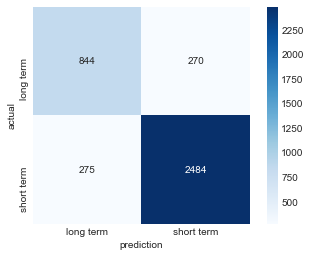

In [80]:
y_predict = (LR_CLF_Scaled.predict_proba(X_val_scaled)[:, 1] >= 0.624)

fraud_confusion = confusion_matrix(y_val, y_predict)

sns.heatmap(fraud_confusion , cmap = plt.cm.Blues, annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term']);
plt.xlabel('prediction')
plt.ylabel('actual');

In [81]:
df_baseline_after_EDA_FE['Term_Short Term'].value_counts()

1    31026
0    12931
Name: Term_Short Term, dtype: int64

In [82]:
LR_CLF_2X = LogisticRegression(class_weight={1 : 1, 0 : 2}, solver='liblinear')
LR_CLF_2X.fit(X_train, y_train)
print('The accuracy for training : ',LR_CLF_2X.score(X_train,y_train))
print('The accuracy for validation: ',LR_CLF_2X.score(X_val,y_val))
print('f1_score for train: ',f1_score(LR_CLF_2X.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(LR_CLF_2X.predict(X_val), y_val))

The accuracy for training :  0.8432473832014297
The accuracy for validation:  0.8466305189775368
f1_score for train:  0.888424495729602
f1_score for validation:  0.8917243893547212


In [83]:
LR_CLF_balanced = LogisticRegression(class_weight='balanced', solver='liblinear')
LR_CLF_balanced.fit(X_train, y_train)
print('The accuracy for training : ',LR_CLF_balanced.score(X_train,y_train))
print('The accuracy for validation: ',LR_CLF_balanced.score(X_val,y_val))
print('f1_score for train: ',f1_score(LR_CLF_balanced.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(LR_CLF_balanced.predict(X_val), y_val))

The accuracy for training :  0.8366734745979065
The accuracy for validation:  0.8352698166795766
f1_score for train:  0.8817413004297796
f1_score for validation:  0.8818955942243614


Logistic Regression Model best F1 score 0.902 at prob decision threshold >= 0.537


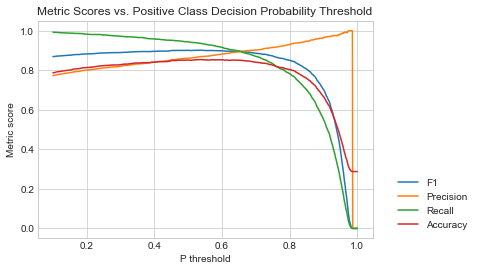

In [84]:

thresh_ps = np.linspace(.10,1,1000)
model_val_probs = LR_CLF.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_val, model_val_labels))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p));

In [85]:
y_predict = (LR_CLF.predict_proba(X_train)[:, 1] >= 0.65)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 0.8894,   Recall: 0.8928


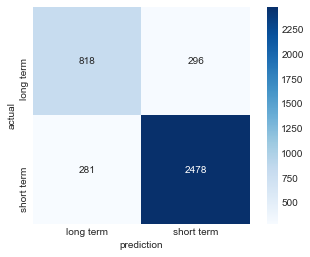

In [86]:
y_predict = (LR_CLF.predict_proba(X_val)[:, 1] >= 0.65)

fraud_confusion = confusion_matrix(y_val, y_predict)

sns.heatmap(fraud_confusion , cmap = plt.cm.Blues, annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term']);
plt.xlabel('prediction')
plt.ylabel('actual');

# KNeighborsClassifier

In [87]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('The accuracy for training : ',knn.score(X_train,y_train))
print('The accuracy for validation: ',knn.score(X_val,y_val))
print('f1_score for train: ',f1_score(knn.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(knn.predict(X_val), y_val))

The accuracy for training :  0.9051250957365331
The accuracy for validation:  0.8332042344435838
f1_score for train:  0.9339612163753083
f1_score for validation:  0.8849305308158176


In [88]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

In [89]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# Apply the same scaler to val set
X_val_poly_scaled = scaler.transform(X_val_poly)

# Fit a knn model using polynomial features
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_poly, y_train)

print(knn.score(X_train_poly,y_train))
print(knn.score(X_val_poly,y_val))


0.9056995149348992
0.8363026077975729


In [90]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('The accuracy for training : ',knn.score(X_train,y_train))
print('The accuracy for validation: ',knn.score(X_val,y_val))
print('f1_score for train: ',f1_score(knn.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(knn.predict(X_val), y_val))

The accuracy for training :  0.8865202961450089
The accuracy for validation:  0.8474051123160341
f1_score for train:  0.9212926073483844
f1_score for validation:  0.8954907161803712


# Decision Tree Classifier

In [91]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# Apply the same scaler to val set
X_val_poly_scaled = scaler.transform(X_val_poly)


# Fit a Decision_Tree model using polynomial features
Decision_Tree = DecisionTreeClassifier(max_depth=8)
Decision_Tree.fit(X_train_poly, y_train)

print(Decision_Tree.score(X_train_poly,y_train))
print(Decision_Tree.score(X_val_poly,y_val))

0.875478682665305
0.8631551768654789


In [92]:
Decision_Tree = DecisionTreeClassifier(max_depth=8)
Decision_Tree.fit(X_train, y_train)
print('The accuracy for training : ',Decision_Tree.score(X_train,y_train))
print('The accuracy for validation: ',Decision_Tree.score(X_val,y_val))
print('f1_score for train: ',f1_score(Decision_Tree.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(Decision_Tree.predict(X_val), y_val))

The accuracy for training :  0.8741064590247638
The accuracy for validation:  0.8678027368964627
f1_score for train:  0.9139153773976041
f1_score for validation:  0.9104582021685903


In [93]:
scores = cross_val_score(Decision_Tree, X,y , cv =5, scoring = 'accuracy')
print(scores.mean())

0.8667566692280626


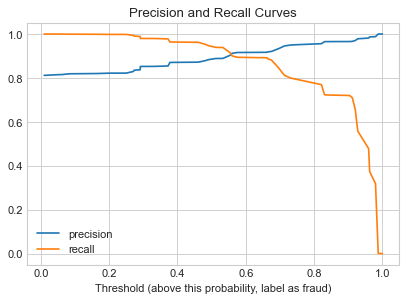

In [94]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, Decision_Tree.predict_proba(X_train)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [95]:
y_predict = (Decision_Tree.predict_proba(X_train)[:, 1] >= 0.5569)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 0.9031,   Recall: 0.9145


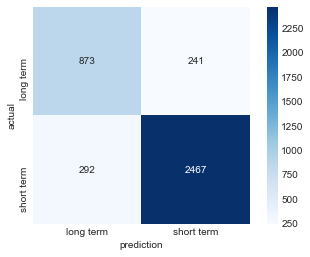

In [96]:
y_predict = (Decision_Tree.predict_proba(X_val)[:, 1] >= 0.61)

fraud_confusion = confusion_matrix(y_val, y_predict)

sns.heatmap(fraud_confusion , cmap = plt.cm.Blues, annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term']);
plt.xlabel('prediction')
plt.ylabel('actual');

# Random Forest

In [98]:
Random_Forest = RandomForestClassifier(n_estimators=100)
Random_Forest.fit(X_train, y_train)
print('The accuracy for training : ',Random_Forest.score(X_train,y_train))
print('The accuracy for validation: ',Random_Forest.score(X_val,y_val))
print('f1_score for train: ',f1_score(Random_Forest.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(Random_Forest.predict(X_val), y_val))

The accuracy for training :  1.0
The accuracy for validation:  0.8776142525174283
f1_score for train:  1.0
f1_score for validation:  0.9161358811040339


In [97]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_val_poly_scaled = scaler.transform(X_val_poly)

Random_Forest = RandomForestClassifier(n_estimators=100)
Random_Forest.fit(X_train_poly_scaled, y_train)

print(Random_Forest.score(X_train_poly_scaled,y_train))
print(Random_Forest.score(X_val_poly_scaled,y_val))

1.0
0.8706429124709527


In [99]:
scores = cross_val_score(Random_Forest, X,y , cv =5, scoring = 'accuracy')
print(scores.mean())

0.8744524463960843


In [100]:
y_predict = (Random_Forest.predict_proba(X_train)[:, 1] >= 0.66)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 1.0000,   Recall: 0.9984


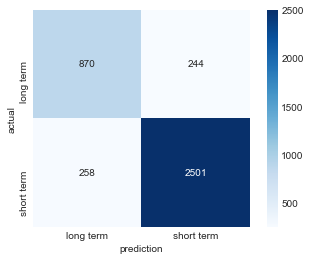

In [101]:
y_predict = (Random_Forest.predict_proba(X_val)[:, 1] >= 0.59)

fraud_confusion = confusion_matrix(y_val, y_predict)

sns.heatmap(fraud_confusion , cmap = plt.cm.Blues, annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term']);
plt.xlabel('prediction')
plt.ylabel('actual');

# Extra Tree

In [102]:
Extra_Tree = ExtraTreesClassifier()
Extra_Tree.fit(X_train, y_train)
print('The accuracy for training : ',Extra_Tree.score(X_train,y_train))
print('The accuracy for validation: ',Extra_Tree.score(X_val,y_val))
print('f1_score for train: ',f1_score(Extra_Tree.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(Extra_Tree.predict(X_val), y_val))

The accuracy for training :  1.0
The accuracy for validation:  0.8675445391169636
f1_score for train:  1.0
f1_score for validation:  0.9104555768895095


In [103]:
scores = cross_val_score(Extra_Tree, X,y , cv =5, scoring = 'accuracy')
print(scores.mean())

0.8665881456808396


In [104]:
y_predict = (Extra_Tree.predict_proba(X_train)[:, 1] >= 0.1)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 1.0000,   Recall: 1.0000


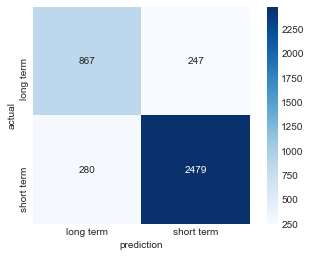

In [105]:
y_predict = (Extra_Tree.predict_proba(X_val)[:, 1] >= 0.62)

fraud_confusion = confusion_matrix(y_val, y_predict)

sns.heatmap(fraud_confusion , cmap = plt.cm.Blues, annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term']);
plt.xlabel('prediction')
plt.ylabel('actual');

# Naive Bayes

In [106]:
Gaussian = GaussianNB()
Gaussian.fit(X_train, y_train)
print('The accuracy for training : ',Gaussian.score(X_train,y_train))
print('The accuracy for validation: ',Gaussian.score(X_val,y_val))
print('f1_score for train: ',f1_score(Gaussian.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(Gaussian.predict(X_val), y_val))

The accuracy for training :  0.8311207556803676
The accuracy for validation:  0.8308804544280919
f1_score for train:  0.8809127323461902
f1_score for validation:  0.8816193746611242


In [107]:
scores = cross_val_score(Gaussian, X,y , cv =200, scoring = 'accuracy')
print(scores.mean())

0.8165926495511896


In [108]:
Bernoulli = BernoulliNB()
Bernoulli.fit(X_train,y_train)
print('The accuracy for training : ',Bernoulli.score(X_train,y_train))
print('The accuracy for validation: ',Bernoulli.score(X_val,y_val))
print('f1_score for train: ',f1_score(Bernoulli.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(Bernoulli.predict(X_val), y_val))

The accuracy for training :  0.6871010977789125
The accuracy for validation:  0.688871675703589
f1_score for train:  0.7962682070355517
f1_score for validation:  0.7981912577457712


In [109]:
MN = MultinomialNB()
MN.fit(X_train, y_train)
print('The accuracy for training : ',MN.score(X_train,y_train))
print('The accuracy for validation: ',MN.score(X_val,y_val))
print('f1_score for train: ',f1_score(MN.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(MN.predict(X_val), y_val))

The accuracy for training :  0.7807633392902732
The accuracy for validation:  0.7771753162922799
f1_score for train:  0.8356931024586244
f1_score for validation:  0.8343252063735841


In [110]:
DC = DummyClassifier()
DC.fit(X_train , y_train)
print('The accuracy for training : ',DC.score(X_train,y_train))
print('The accuracy for validation: ',DC.score(X_val,y_val))
print('f1_score for train: ',f1_score(DC.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(DC.predict(X_val), y_val))

The accuracy for training :  0.7057697217258105
The accuracy for validation:  0.7123676736380067
f1_score for train:  0.827508792935718
f1_score for validation:  0.8320265379975874


# Ada Boost Classifier

In [111]:
AB_CLF = AdaBoostClassifier(n_estimators=50, random_state=0)
AB_CLF.fit(X_train , y_train)
print('The accuracy for training : ',AB_CLF.score(X_train,y_train))
print('The accuracy for validation: ',AB_CLF.score(X_val,y_val))
print('f1_score for train: ',f1_score(AB_CLF.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(AB_CLF.predict(X_val), y_val))

The accuracy for training :  0.8738192494255808
The accuracy for validation:  0.8758068680609347
f1_score for train:  0.9131752305665349
f1_score for validation:  0.9155102757772703


# Stochastic Gradient Descent Algorithm

In [112]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
SG_PIP_CLF = make_pipeline(StandardScaler(),
                     SGDClassifier(max_iter=100, tol=1e-3))
SG_PIP_CLF.fit(X_train , y_train)
print('The accuracy for training : ',SG_PIP_CLF.score(X_train,y_train))
print('The accuracy for validation: ',SG_PIP_CLF.score(X_val,y_val))
print('f1_score for train: ',f1_score(SG_PIP_CLF.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(SG_PIP_CLF.predict(X_val), y_val))

The accuracy for training :  0.8545442941026296
The accuracy for validation:  0.855151045701007
f1_score for train:  0.9027315407597097
f1_score for validation:  0.9038560411311053


# XGBoost (eXtreme Gradient Boosting)

In [113]:
X_train.columns = X_train.columns.str.replace('<','less').str.replace(' ','_')
X_val.columns = X_val.columns.str.replace('<','less').str.replace(' ','_')

In [ ]:
xgb_model = xgb.XGBClassifier()


parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate':list(range(0.1 , 0.9)), #so called `eta` value
              'max_depth':list(range(3 , 10)),
              'min_child_weight': [11],
              'silent': [1],
              'subsample': list(range(3 , 10)),
              'colsample_bytree': [0.7],
              'n_estimators':list(range(7000 , 10001, 500)), #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}


clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=KFold(shuffle=True , random_state = 1), 
                   scoring='accuracy',
                   verbose=2, refit=True)

clf.fit(X_train,y_train)

In [ ]:
clf.best_params_

In [114]:
gbm = xgb.XGBClassifier( 
                        n_estimators=7500,
                        max_depth=3,
                        objective='binary:logistic', #new objective
                        learning_rate=.6, 
                        subsample=.93,
                        min_child_weight=5,
                        colsample_bytree=.75
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

print(accuracy_score(y_train, gbm.predict(X_train, ntree_limit=gbm.best_ntree_limit)))
print(accuracy_score(y_val, gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit)))
print('f1_score for train: ',f1_score(gbm.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(gbm.predict(X_val), y_val))

0.8878606076078631
0.8801962303124193
f1_score for train:  0.922486434023029
f1_score for validation:  0.917963224893918


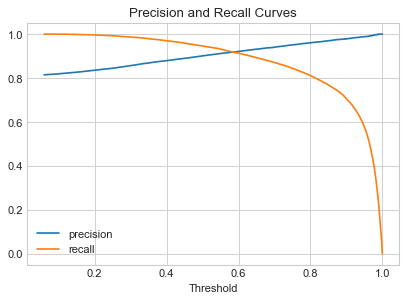

In [115]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, gbm.predict_proba(X_train)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold');
plt.title('Precision and Recall Curves');

In [116]:
y_predict = (gbm.predict_proba(X_train)[:, 1] >= 0.59)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 0.9187,   Recall: 0.9166


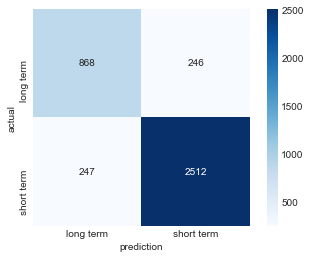

In [117]:
y_predict = (gbm.predict_proba(X_val)[:, 1] >= 0.59)

fraud_confusion = confusion_matrix(y_val, y_predict)

sns.heatmap(fraud_confusion , cmap = plt.cm.Blues, annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term']);
plt.xlabel('prediction')
plt.ylabel('actual');

In [118]:

fpr , tpr, threesholds = roc_curve(y_val , gbm.predict_proba(X_val)[:,1])

ROC AUC score =  0.8448244784654498


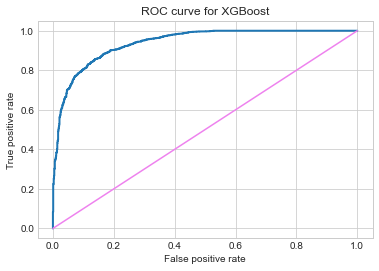

In [119]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='-')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for XGBoost');
print("ROC AUC score = ", roc_auc_score(y_val, gbm.predict_proba(X_val)[:,1]>= 0.59))

# ROC AUC CURVE

In [120]:
classifiers = [
    DecisionTreeClassifier(max_depth=8),
    RandomForestClassifier(n_estimators=100),
    ExtraTreesClassifier(),
    GaussianNB(),
    AdaBoostClassifier(n_estimators=50, random_state=0),
    make_pipeline(StandardScaler(),
            SGDClassifier(max_iter=100, tol=1e-3)),
    xgb.XGBClassifier( 
                        n_estimators=7500,
                        max_depth=3,
                        objective='binary:logistic', #new objective
                        learning_rate=.6, 
                        subsample=.93,
                        min_child_weight=5,
                        colsample_bytree=.75
                       ),

    LogisticRegression()]

[12:02:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


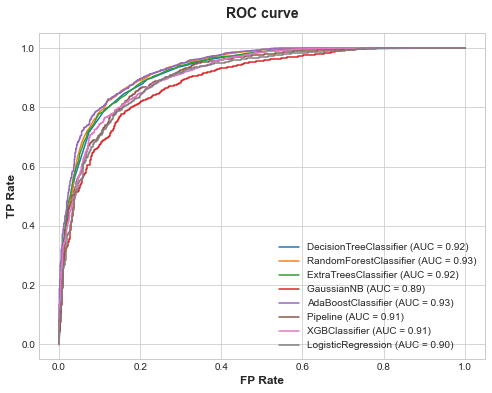

In [121]:

fig, ax = plt.subplots(figsize=(8,6))

model_displays = {}
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = type(clf).__name__
    model_displays[type(clf).__name__] = plot_roc_curve(clf, X_val, y_val, ax=ax, name=name)
    ax.set_title('ROC curve', fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel("FP Rate", fontsize=12, fontweight='bold')
    ax.set_ylabel("TP Rate", fontsize=12, fontweight='bold')

# Pickle models

In [122]:

lr_model = linear_model.LogisticRegression(solver="lbfgs", random_state=1)
dt_model = tree.DecisionTreeClassifier(max_depth=8)
ADA_model = AdaBoostClassifier(n_estimators=50, random_state=0)
SGD_model = make_pipeline(StandardScaler(),
                     SGDClassifier(max_iter=100, tol=1e-3))

models = ["lr_model","dt_model","ADA_model","SGD_model"]




In [123]:
for model_name in models:
    
    curr_model = eval(model_name)
    
    curr_model.fit(X_train, y_train)
    
    with open(f"{model_name}.pickle", "wb") as pfile:
        pickle.dump(curr_model, pfile)

In [124]:
model_names = ["lr_model","dt_model","ADA_model","SGD_model"]

for model_name in model_names:
    with open(f"{model_name}.pickle", "rb") as pfile:
        exec(f"{model_name} = pickle.load(pfile)")

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [125]:
for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} score: {curr_model.score(X_train, y_train)}')
    print(f'{model_name} score: {curr_model.score(X_val, y_val)}')

lr_model score: 0.8485448046974725
lr_model score: 0.8528272656855151
dt_model score: 0.8741064590247638
dt_model score: 0.86857733023496
ADA_model score: 0.8738192494255808
ADA_model score: 0.8758068680609347
SGD_model score: 0.8603523104416645
SGD_model score: 0.8641879679834753


# voting classifer (HARD)

In [126]:
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('lr_model', LogisticRegression(random_state=1)),
                             ('dt_model', DecisionTreeClassifier(max_depth=8)),
                             ('ADA_model', AdaBoostClassifier(random_state=0)),
                             ('SGD_model',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('sgdclassifier',
                                               SGDClassifier(max_iter=100))]))],
                 n_jobs=-1)

In [127]:
y_pred = voting_classifer.predict(X_train)
accuracy_score(y_train, y_pred)

0.8723512892519786

In [128]:
y_pred = voting_classifer.predict(X_val)
accuracy_score(y_val, y_pred)

0.8763232636199328

# Stacking Classifier

In [129]:
stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)

In [130]:
stacked.fit(X_train, y_train)

StackingClassifier(classifiers=[LogisticRegression(random_state=1),
                                DecisionTreeClassifier(max_depth=8),
                                AdaBoostClassifier(random_state=0),
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('sgdclassifier',
                                                 SGDClassifier(max_iter=100))])],
                   meta_classifier=LogisticRegression())

In [131]:
y_pred = stacked.predict(X_train)
accuracy_score(y_train, y_pred)

0.875159560888435

In [132]:
y_pred = stacked.predict(X_val)
accuracy_score(y_val, y_pred)

0.8781306480764265

# Final model (test)

In [133]:
X.columns = X.columns.str.replace('<','less').str.replace(' ','_')
X_test.columns = X_test.columns.str.replace('<','less').str.replace(' ','_')

In [134]:
gbm = xgb.XGBClassifier( 
                        n_estimators=7500,
                        max_depth=3,
                        objective='binary:logistic', 
                        learning_rate=.6, 
                        subsample=.93,
                        min_child_weight=5,
                        colsample_bytree=.75
                       )

eval_set=[(X,y),(X_test,y_test)]
fit_model = gbm.fit( 
                    X, y, 
                    eval_set=eval_set,
                    eval_metric='error', 
                    early_stopping_rounds=50,
                    verbose=False
                   )

print('accuracy for train: ',accuracy_score(y, gbm.predict(X, ntree_limit=gbm.best_ntree_limit)))
print('accuracy for test: ',accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)))
print('f1_score for train: ',f1_score(gbm.predict(X), y))
print('f1_score for test: ',f1_score(gbm.predict(X_test), y_test))

accuracy for train:  0.8983541175148859
accuracy for test:  0.8776851149861006
f1_score for train:  0.9298983050847457
f1_score for test:  0.915855354659249
